## 1. Importing Libraries

In [217]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Reading the training data

In [218]:
PROCESSED_DATA_DIR = r'..\data\processed'
RAW_DATA_DIR = r'..\data\raw'

In [219]:
def get_data(file_name):
    f_name = f'{file_name}.csv'
    f_path = os.path.join(PROCESSED_DATA_DIR, f_name)
    return pd.read_csv(f_path)

In [220]:
train = get_data('train')
train

neighbourhood_group       neighbourhood  latitude  longitude  \
0               Manhattan  Washington Heights  40.84996  -73.93937   
1               Manhattan           Chinatown  40.71610  -73.99828   
2                  Queens            Elmhurst  40.73088  -73.87488   
3               Manhattan              Harlem  40.82396  -73.94388   
4                  Queens      Queens Village  40.72085  -73.74960   
...                   ...                 ...       ...        ...   
30944            Brooklyn         Bensonhurst  40.62071  -73.99912   
30945              Queens           Sunnyside  40.74372  -73.92416   
30946           Manhattan  Financial District  40.70358  -74.00854   
30947            Brooklyn        Williamsburg  40.71724  -73.94492   
30948           Manhattan             Midtown  40.75486  -73.97252   

             room_type  minimum_nights  number_of_reviews last_review  \
0         Private room               5                  1  2016-05-28   
1      Entire home/apt               2                 43  2019-01-03   
2      Entire home/apt               2                 47  2019-06-27   
3      Entire home/apt               5                 81  2019-06-09   
4      Entire home/apt               2                 33  2019-06-30   
...                ...             ...                ...         ...   
30944     Private room               1                 13  2019-06-30   
30945  Entire home/apt               1                  1  2019-06-21   
30946  Entire home/apt              30                  0         NaN   
30947  Entire home/apt              15                  8  2019-06-09   
30948     Private room               3                  8  2018-09-16   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.03                               1                 0   
1                   1.32                               1                 0   
2                   4.18                               1               315   
3                   1.48                               3               303   
4                   3.60                               1               282   
...                  ...                             ...               ...   
30944               2.07                               1               324   
30945               1.00                               1               179   
30946                NaN                              87               190   
30947               0.31                               1               198   
30948               0.65                               1                 0   

       price  
0         50  
1        140  
2        125  
3        450  
4         68  
...      ...  
30944     45  
30945    200  
30946    270  
30947    190  
30948    125  

[30949 rows x 12 columns]

In [221]:
train = (
    train
    .assign(
            last_review=lambda df_: pd.to_datetime(df_.last_review, format='%Y-%m-%d')
        )
)

## 3. High Level Summary of Data

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30949 entries, 0 to 30948
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             30949 non-null  object        
 1   neighbourhood                   30949 non-null  object        
 2   latitude                        30949 non-null  float64       
 3   longitude                       30949 non-null  float64       
 4   room_type                       30949 non-null  object        
 5   minimum_nights                  30949 non-null  int64         
 6   number_of_reviews               30949 non-null  int64         
 7   last_review                     24703 non-null  datetime64[ns]
 8   reviews_per_month               24703 non-null  float64       
 9   calculated_host_listings_count  30949 non-null  int64         
 10  availability_365                30949 non-null  int64         
 11  pr

In [223]:
train.describe(include='number')

latitude     longitude  minimum_nights  number_of_reviews  \
count  30949.000000  30949.000000    30949.000000       30949.000000   
mean      40.728775    -73.952166        5.716857          23.324405   
std        0.054530      0.046491        8.392343          44.473434   
min       40.499790    -74.244420        1.000000           0.000000   
25%       40.690060    -73.983090        1.000000           1.000000   
50%       40.722920    -73.955650        2.000000           5.000000   
75%       40.762950    -73.936180        5.000000          24.000000   
max       40.905270    -73.712990       35.000000         629.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       24703.000000                    30949.000000      30949.000000   
mean            1.377573                        7.144302        112.177389   
std             1.657020                       32.950548        131.467903   
min             0.010000                        1.000000          0.000000   
25%             0.190000                        1.000000          0.000000   
50%             0.740000                        1.000000         44.000000   
75%             2.020000                        2.000000        225.000000   
max            27.950000                      327.000000        365.000000   

              price  
count  30949.000000  
mean     152.128179  
std      232.186574  
min       10.000000  
25%       69.000000  
50%      105.000000  
75%      175.000000  
max    10000.000000

In [224]:
train.describe(include='O')

neighbourhood_group neighbourhood        room_type
count                30949         30949            30949
unique                   5           217                3
top              Manhattan  Williamsburg  Entire home/apt
freq                 13698          2483            16045

## 4. High Level Analysis of Missing Values

In [225]:
eda_helper_functions.missing_info(train)

count  percentage
variable                            
last_review         6246   20.181589
reviews_per_month   6246   20.181589

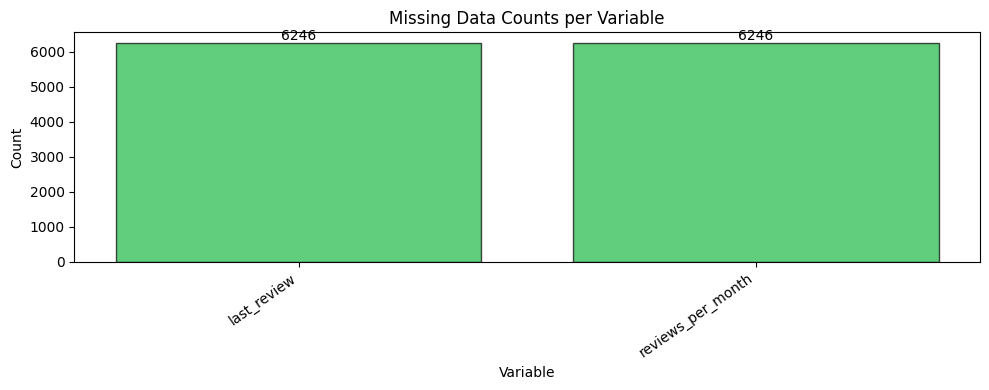

In [226]:
eda_helper_functions.plot_missing_info(train)

## 5. High Level analysis of Outliers

In [227]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [228]:
(
    train
    .assign(
        outlier=lambda df_: forest.fit_predict(
            df_
            .drop(columns='price')
            .select_dtypes(include='number')
        )
    )
    .query('outlier == -1')
)

neighbourhood_group       neighbourhood  latitude  longitude  \
3               Manhattan              Harlem  40.82396  -73.94388   
4                  Queens      Queens Village  40.72085  -73.74960   
6                  Queens       East Elmhurst  40.76071  -73.88406   
7                  Queens            Woodside  40.74609  -73.90632   
8               Manhattan         Murray Hill  40.74454  -73.97339   
...                   ...                 ...       ...        ...   
30935           Manhattan  Financial District  40.70673  -74.00565   
30937              Queens             Jamaica  40.68055  -73.78263   
30938            Brooklyn      Sheepshead Bay  40.60930  -73.95211   
30944            Brooklyn         Bensonhurst  40.62071  -73.99912   
30946           Manhattan  Financial District  40.70358  -74.00854   

             room_type  minimum_nights  number_of_reviews last_review  \
3      Entire home/apt               5                 81  2019-06-09   
4      Entire home/apt               2                 33  2019-06-30   
6         Private room               1                104  2019-07-04   
7         Private room              30                  0         NaT   
8      Entire home/apt              29                  1  2018-07-12   
...                ...             ...                ...         ...   
30935  Entire home/apt              29                  0         NaT   
30937     Private room               1                  0         NaT   
30938      Shared room               2                  8  2019-06-08   
30944     Private room               1                 13  2019-06-30   
30946  Entire home/apt              30                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
3                   1.48                               3               303   
4                   3.60                               1               282   
6                   8.64                               4               351   
7                    NaN                             103               230   
8                   0.08                              96               365   
...                  ...                             ...               ...   
30935                NaN                             327               347   
30937                NaN                               1               180   
30938               2.55                               8               358   
30944               2.07                               1               324   
30946                NaN                              87               190   

       price  outlier  
3        450       -1  
4         68       -1  
6         40       -1  
7         41       -1  
8        207       -1  
...      ...      ...  
30935    100       -1  
30937     95       -1  
30938     40       -1  
30944     45       -1  
30946    270       -1  

[5998 rows x 13 columns]

## 6. Pair Plots

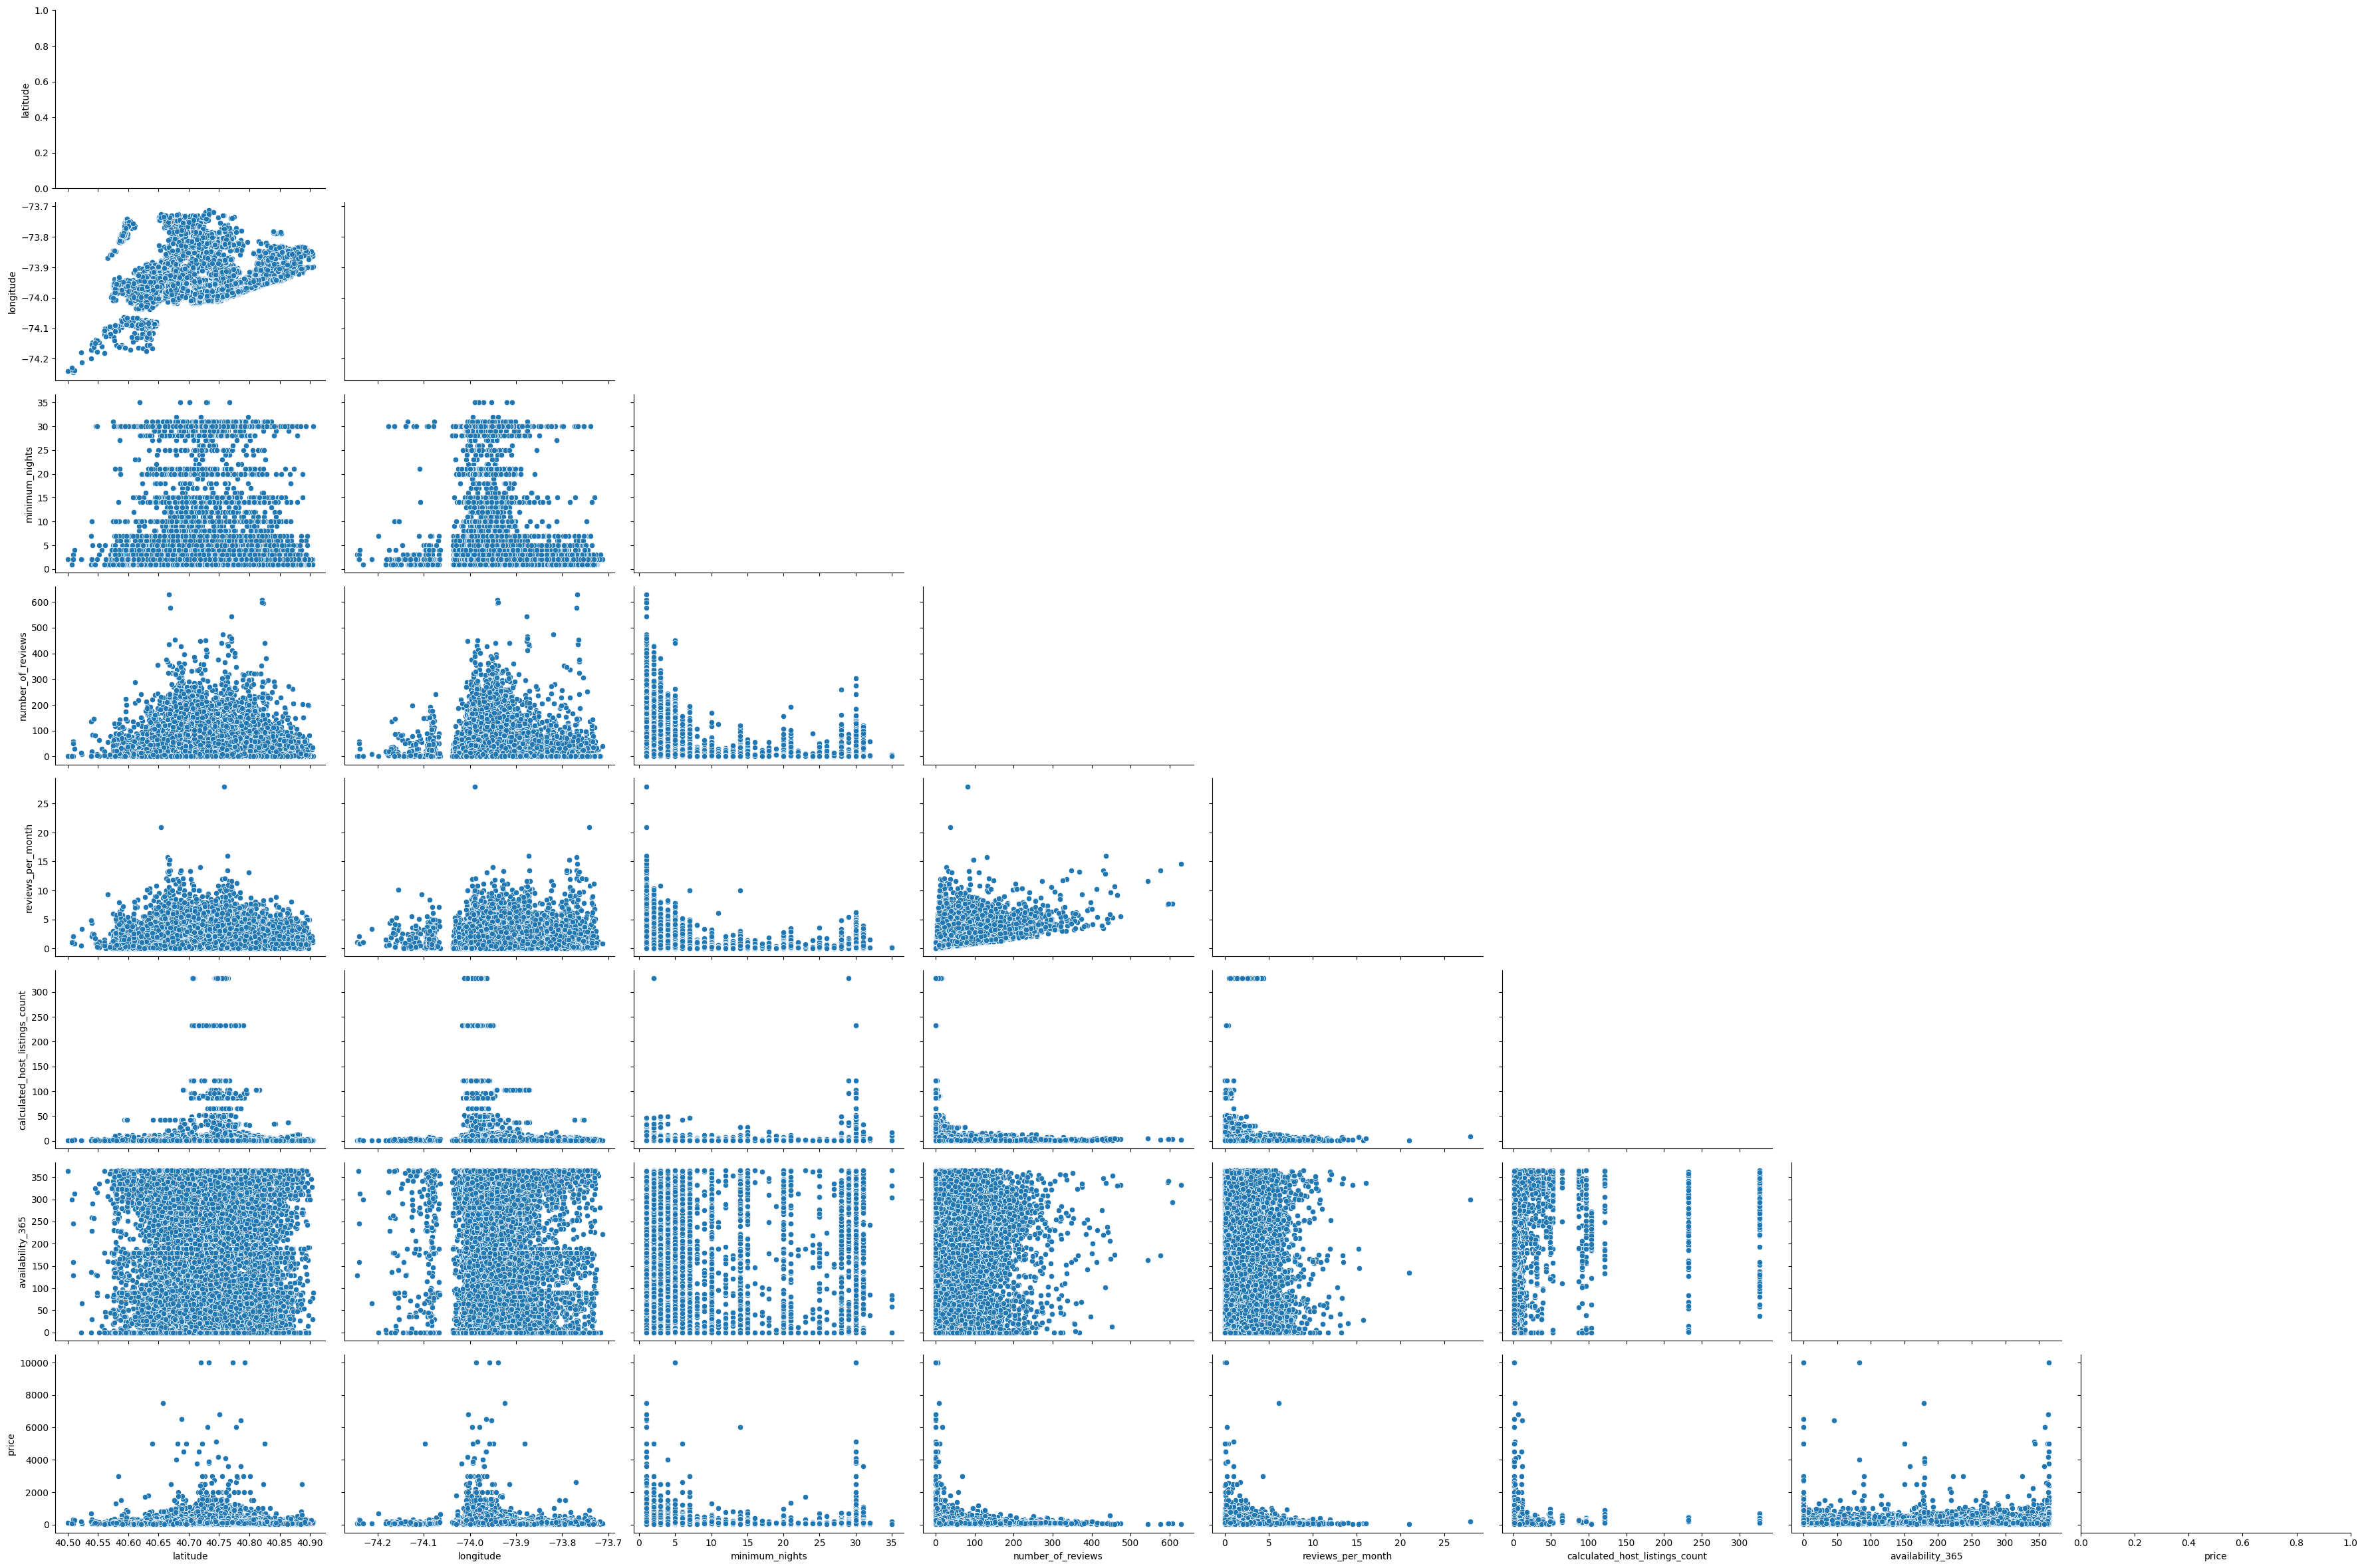

In [229]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

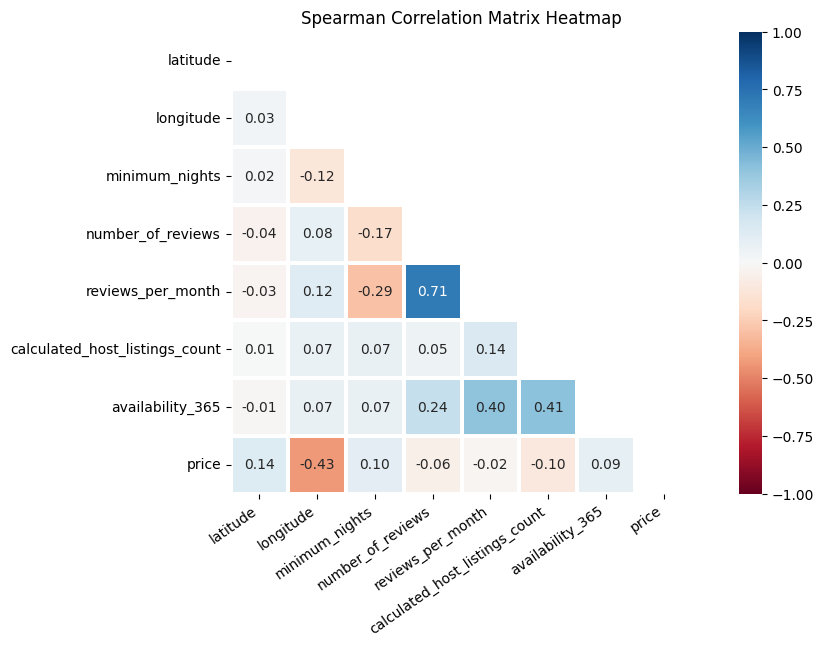

In [230]:
eda_helper_functions.correlation_heatmap(train)

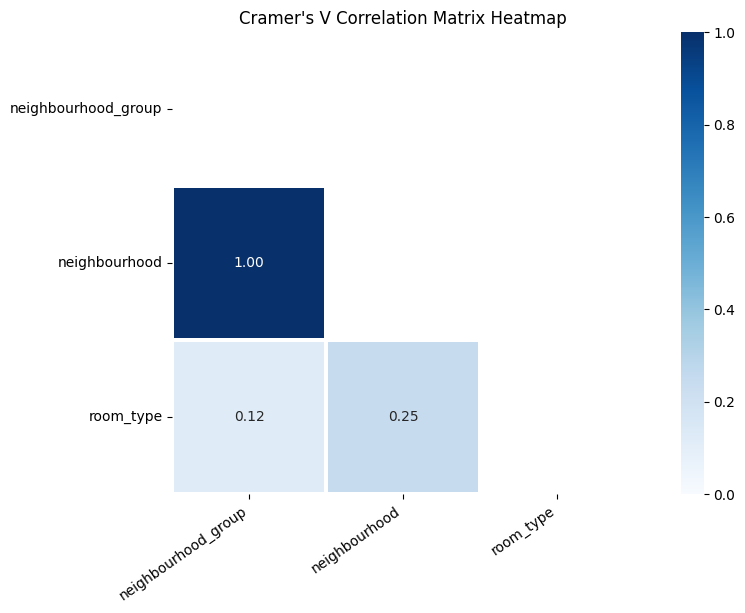

In [231]:
eda_helper_functions.cramersV_heatmap(train.select_dtypes(exclude=['datetime64[ns]']))

## 8. Detailed Analysis

In [232]:
train = (
    train
    .assign(**{
    col: train[col].astype('category')
    for col in ['neighbourhood_group', 'room_type']
    })
)

### 8.1 `neighbourhood_group`

In [233]:
train.neighbourhood_group

0        Manhattan
1        Manhattan
2           Queens
3        Manhattan
4           Queens
           ...    
30944     Brooklyn
30945       Queens
30946    Manhattan
30947     Brooklyn
30948    Manhattan
Name: neighbourhood_group, Length: 30949, dtype: category
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [234]:
eda_helper_functions.cat_summary(train, 'neighbourhood_group')

0        Manhattan
1        Manhattan
2           Queens
3        Manhattan
4           Queens
           ...    
30944     Brooklyn
30945       Queens
30946    Manhattan
30947     Brooklyn
30948    Manhattan
Name: neighbourhood_group, Length: 30949, dtype: category
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

Data Type      : category
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


count       30949
unique          5
top     Manhattan
freq        13698

count  percentage
category                        
Manhattan      13698    0.442599
Brooklyn       12714    0.410805
Queens          3631    0.117322
Bronx            654    0.021132
Staten Island    252    0.008142

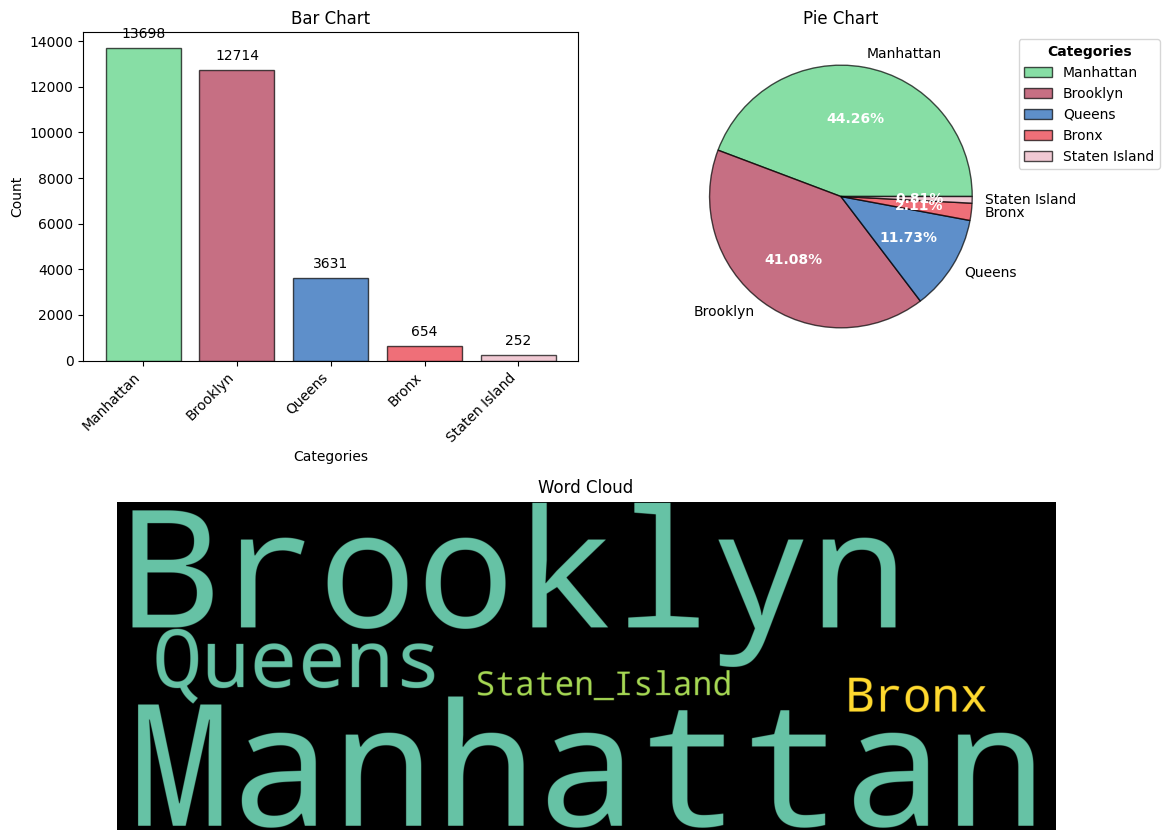

In [235]:
eda_helper_functions.cat_univar_plots(train, 'neighbourhood_group')

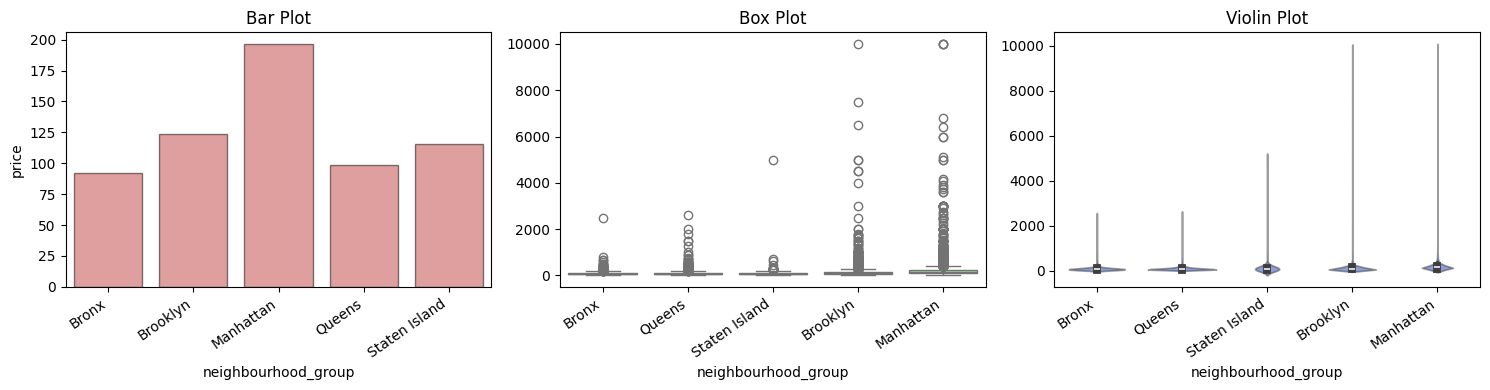

In [236]:
eda_helper_functions.num_cat_bivar_plots(train, 'price', 'neighbourhood_group')

In [237]:
eda_helper_functions.num_cat_hyp_testing(train, 'price', 'neighbourhood_group')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 238.51477621025248
- p-value              : 4.212696237010507e-202
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and neighbourhood_group are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 4379.504829002156
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and neighbourhood_group are associated to each other


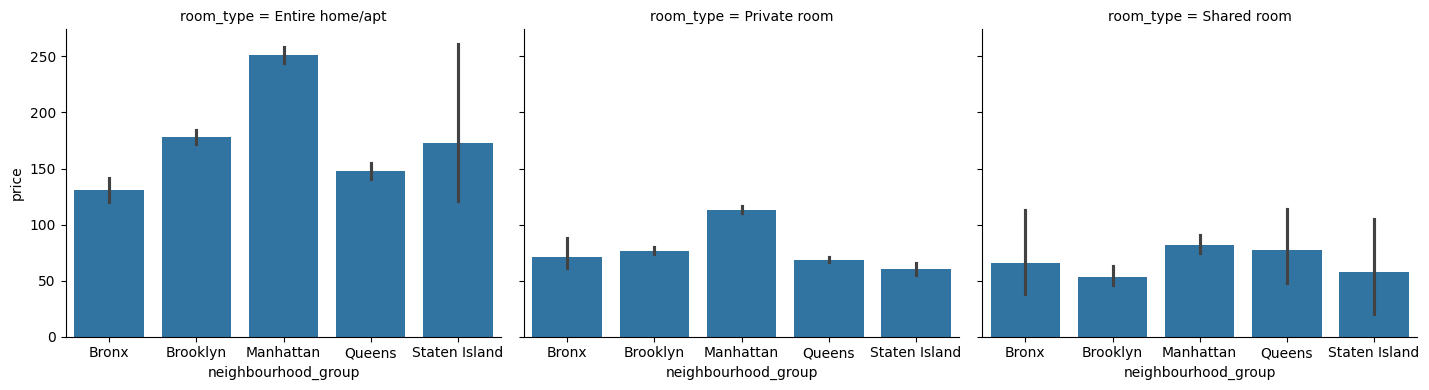

In [238]:
neighbourhood_group_grid = sns.FacetGrid(
    data=train,
    col='room_type',
    height=4,
    aspect=1.2
)
neighbourhood_group_grid.map_dataframe(sns.barplot, 'neighbourhood_group', 'price')

### 8.2 `room_type`

In [239]:
train.room_type

0           Private room
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
30944       Private room
30945    Entire home/apt
30946    Entire home/apt
30947    Entire home/apt
30948       Private room
Name: room_type, Length: 30949, dtype: category
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

In [240]:
eda_helper_functions.cat_summary(train, 'room_type')

0           Private room
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
30944       Private room
30945    Entire home/apt
30946    Entire home/apt
30947    Entire home/apt
30948       Private room
Name: room_type, Length: 30949, dtype: category
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

Data Type      : category
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


count             30949
unique                3
top     Entire home/apt
freq              16045

count  percentage
category                          
Entire home/apt  16045    0.518434
Private room     14173    0.457947
Shared room        731    0.023620

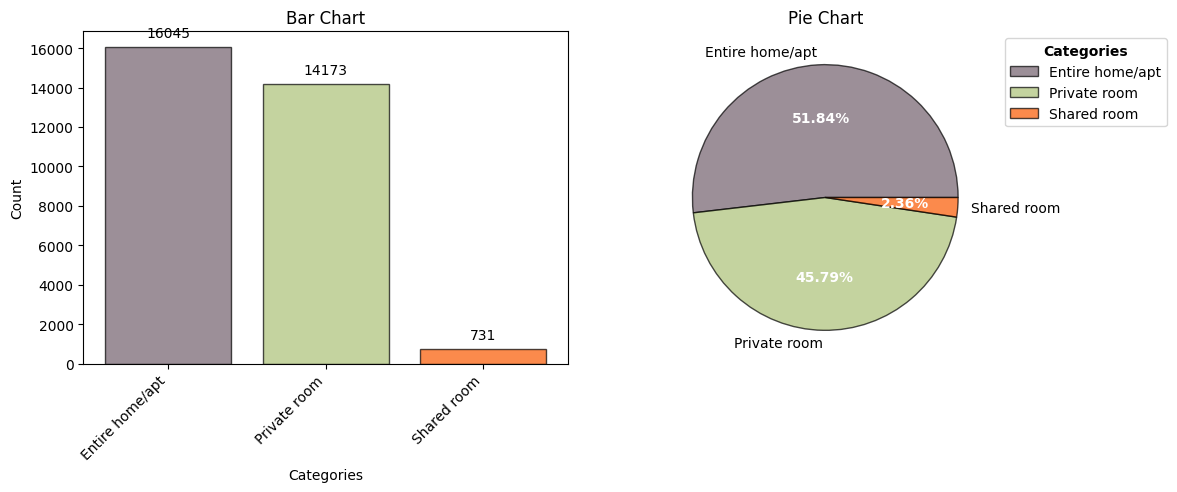

In [241]:
eda_helper_functions.cat_univar_plots(train, 'room_type', show_wordcloud=False)

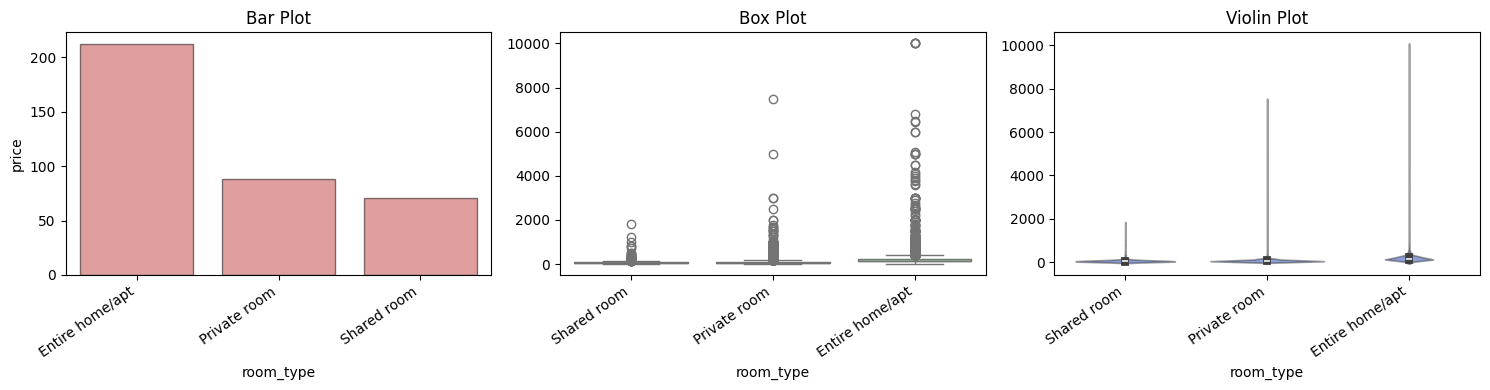

In [242]:
eda_helper_functions.num_cat_bivar_plots(train, 'price', 'room_type')

### 8.3 `minimum_nights`

In [243]:
eda_helper_functions.num_summary(train, 'minimum_nights')

0         5
1         2
2         2
3         5
4         2
         ..
30944     1
30945     1
30946    30
30947    15
30948     3
Name: minimum_nights, Length: 30949, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


value
percentile       
0             1.0
5             1.0
10            1.0
25            1.0
50            2.0
75            5.0
90           21.0
95           30.0
99           30.0
100          35.0

value
mean                5.716857
trimmed mean (5%)   4.624233
trimmed mean (10%)  3.332256
median              2.000000

value
var            70.431427
std             8.392343
IQR             4.000000
mad             1.000000
coef_variance   1.468000

value
skewness  2.287606
kurtosis  3.740332

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.5237995893541143e-125
Test Statistic       : 0.5548891153909817
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 5726.003546100132
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


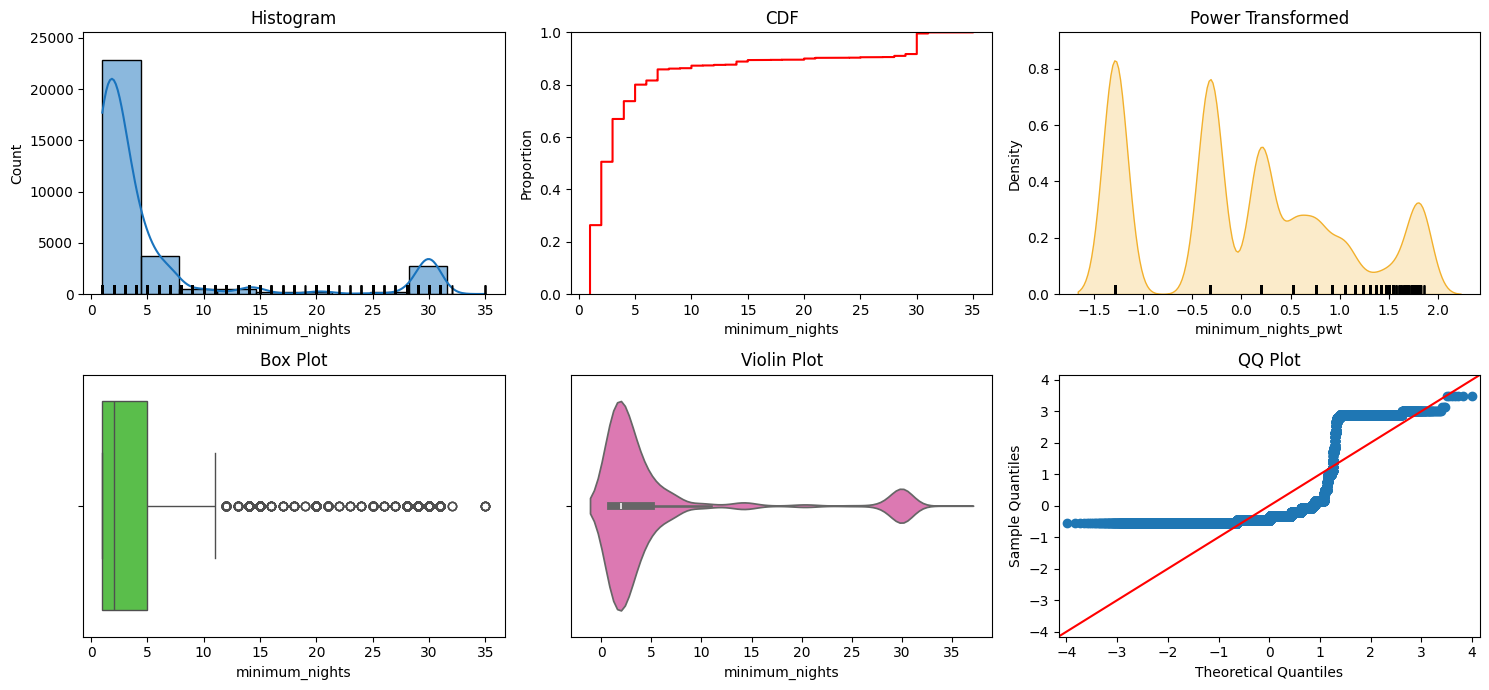

In [244]:
eda_helper_functions.num_univar_plots(train, 'minimum_nights')

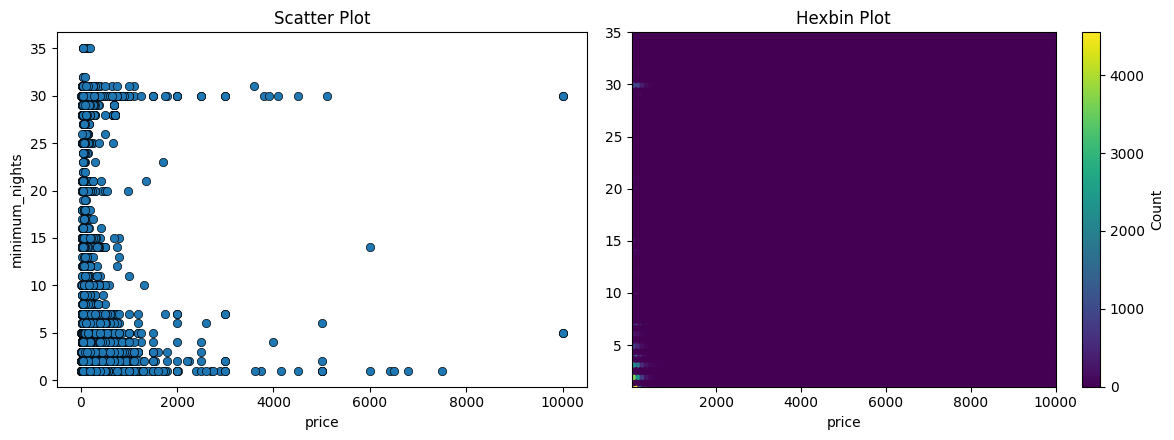

In [245]:
eda_helper_functions.num_bivar_plots(train, 'price', 'minimum_nights')

In [246]:
eda_helper_functions.num_num_hyp_testing(train, 'price', 'minimum_nights')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.03972327921337999
- p-value              : 2.7346683943271267e-12
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and minimum_nights are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.10363424896569326
- p-value              : 1.1903738216900459e-74
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and minimum_nights are correlated


In [247]:
eda_helper_functions.get_iqr_outliers(train, 'minimum_nights')

Lower Limit : -5.0
Upper Limit : 11.0


neighbourhood_group       neighbourhood  latitude  longitude  \
30895            Brooklyn          Park Slope  40.67079  -73.97384   
30908            Brooklyn        Williamsburg  40.71621  -73.93984   
92              Manhattan     Upper West Side  40.79954  -73.96260   
11656           Manhattan     Upper East Side  40.76989  -73.94961   
17632            Brooklyn  Bedford-Stuyvesant  40.68155  -73.91435   
...                   ...                 ...       ...        ...   
17034           Manhattan      Hell's Kitchen  40.76662  -73.98864   
6344             Brooklyn            Bushwick  40.70126  -73.92077   
3062            Manhattan     Stuyvesant Town  40.73082  -73.98023   
27199            Brooklyn  Bedford-Stuyvesant  40.68583  -73.95296   
1868               Queens           Ridgewood  40.70083  -73.90802   

             room_type  minimum_nights  number_of_reviews last_review  \
30895  Entire home/apt              12                  2  2017-08-13   
30908     Private room              12                  2  2015-10-14   
92        Private room              12                  0         NaT   
11656     Private room              12                  1  2017-08-16   
17632     Private room              12                 27  2019-06-16   
...                ...             ...                ...         ...   
17034  Entire home/apt              35                  0         NaT   
6344      Private room              35                  2  2019-03-29   
3062   Entire home/apt              35                  2  2018-06-30   
27199     Private room              35                  1  2018-08-01   
1868      Private room              35                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
30895               0.08                               1                 0   
30908               0.04                               1                 0   
92                   NaN                               1                 0   
11656               0.04                               1                 0   
17632               0.73                               4               342   
...                  ...                             ...               ...   
17034                NaN                               1                58   
6344                0.30                              17               365   
3062                0.16                               1                83   
27199               0.09                               1                75   
1868                 NaN                              10               331   

       price  
30895    195  
30908     65  
92        42  
11656     53  
17632     70  
...      ...  
17034    200  
6344      55  
3062     150  
27199     47  
1868      47  

[3914 rows x 12 columns]

### 8.4 `number_of_reviews`

In [248]:
eda_helper_functions.num_summary(train, 'number_of_reviews')

0         1
1        43
2        47
3        81
4        33
         ..
30944    13
30945     1
30946     0
30947     8
30948     8
Name: number_of_reviews, Length: 30949, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


value
percentile       
0             0.0
5             0.0
10            0.0
25            1.0
50            5.0
75           24.0
90           70.0
95          114.0
99          214.0
100         629.0

value
mean                23.324405
trimmed mean (5%)   16.099264
trimmed mean (10%)  12.547110
median               5.000000

value
var            1977.886292
std              44.473434
IQR              23.000000
mad               5.000000
coef_variance     1.906734

value
skewness   3.720973
kurtosis  20.289295

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.1317396099337149e-124
Test Statistic       : 0.5610893099292121
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 4449.440081500456
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


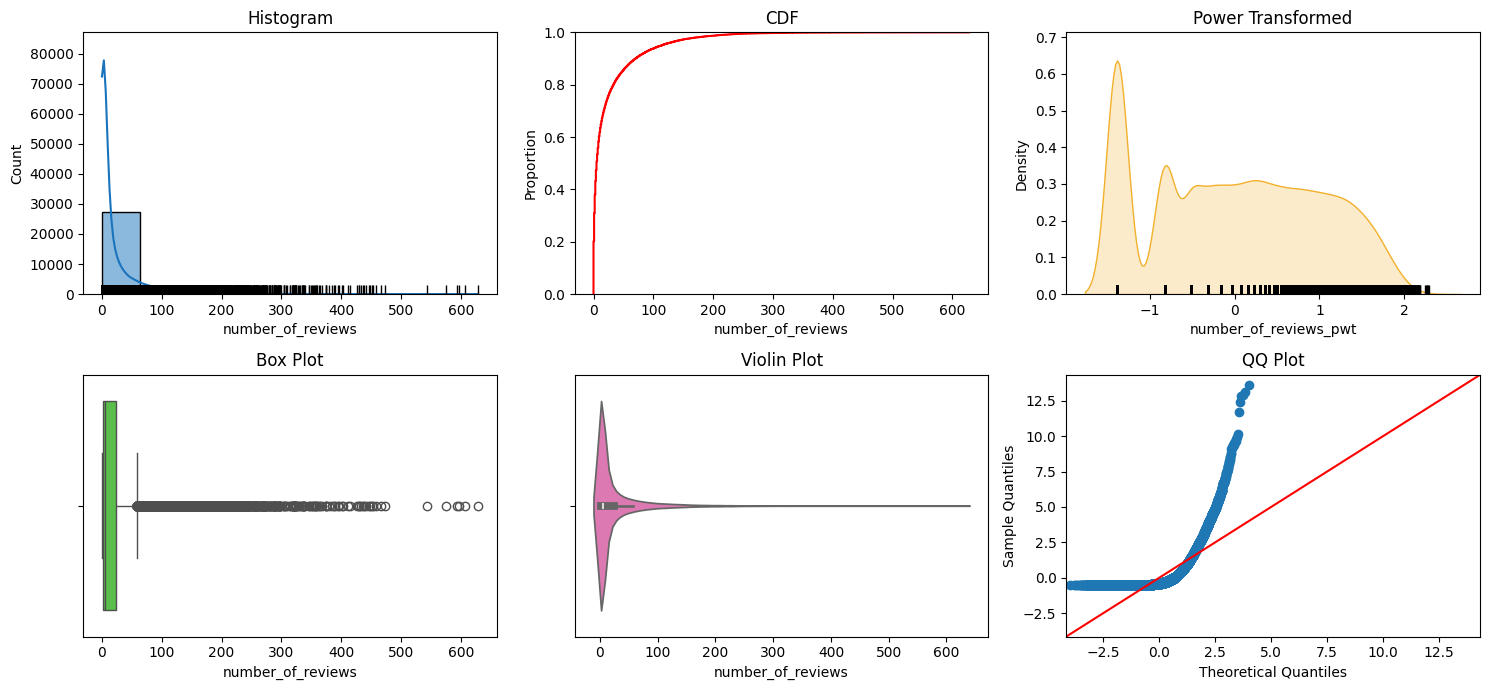

In [249]:
eda_helper_functions.num_univar_plots(train, 'number_of_reviews')

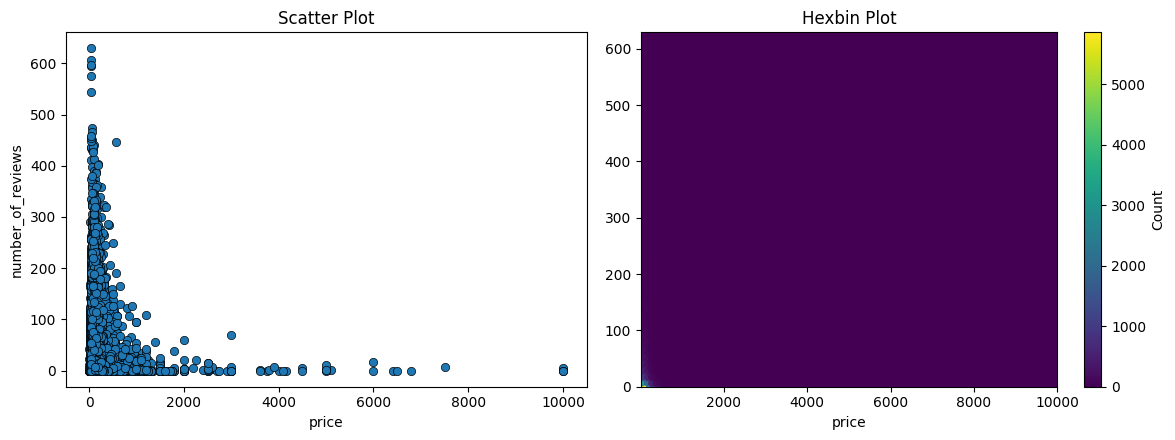

In [250]:
eda_helper_functions.num_bivar_plots(train, 'price', 'number_of_reviews')

In [251]:
eda_helper_functions.num_num_hyp_testing(train, 'price', 'number_of_reviews')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.04874437497959852
- p-value              : 9.485332538503706e-18
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and number_of_reviews are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.05638284088176062
- p-value              : 3.1910527015189445e-23
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and number_of_reviews are correlated


In [252]:
eda_helper_functions.get_iqr_outliers(train, 'number_of_reviews')

Lower Limit : -33.5
Upper Limit : 58.5


neighbourhood_group       neighbourhood  latitude  longitude  \
30858               Bronx            Edenwald  40.89124  -73.83423   
25274            Brooklyn  Bedford-Stuyvesant  40.68476  -73.95471   
14457           Manhattan            Kips Bay  40.74404  -73.97985   
3392               Queens           Briarwood  40.71151  -73.81561   
29467            Brooklyn      Sheepshead Bay  40.60991  -73.95677   
...                   ...                 ...       ...        ...   
7239               Queens             Jamaica  40.66939  -73.76975   
6790            Manhattan              Harlem  40.82264  -73.94041   
11796           Manhattan              Harlem  40.82124  -73.93838   
4125            Manhattan              Harlem  40.82085  -73.94025   
9882               Queens             Jamaica  40.66730  -73.76831   

             room_type  minimum_nights  number_of_reviews last_review  \
30858  Entire home/apt               2                 59  2019-06-24   
25274  Entire home/apt               5                 59  2019-07-04   
14457     Private room               3                 59  2019-06-23   
3392      Private room               1                 59  2018-11-09   
29467      Shared room               1                 59  2019-07-05   
...                ...             ...                ...         ...   
7239      Private room               1                576  2019-06-27   
6790      Private room               1                594  2019-06-15   
11796     Private room               1                597  2019-06-23   
4125      Private room               1                607  2019-06-21   
9882      Private room               1                629  2019-07-05   

       reviews_per_month  calculated_host_listings_count  availability_365  \
30858               4.33                               1               328   
25274               2.40                               2               243   
14457               2.92                               1                51   
3392                0.69                               2                 0   
29467               1.26                               1                90   
...                  ...                             ...               ...   
7239               13.40                               2               173   
6790                7.57                               3               339   
11796               7.72                               3               342   
4125                7.75                               3               293   
9882               14.58                               2               333   

       price  
30858    149  
25274    160  
14457    110  
3392      75  
29467     48  
...      ...  
7239      47  
6790      49  
11796     49  
4125      49  
9882      47  

[3811 rows x 12 columns]

### 8.5 `last_review`

In [253]:
train.last_review

0       2016-05-28
1       2019-01-03
2       2019-06-27
3       2019-06-09
4       2019-06-30
           ...    
30944   2019-06-30
30945   2019-06-21
30946          NaT
30947   2019-06-09
30948   2018-09-16
Name: last_review, Length: 30949, dtype: datetime64[ns]

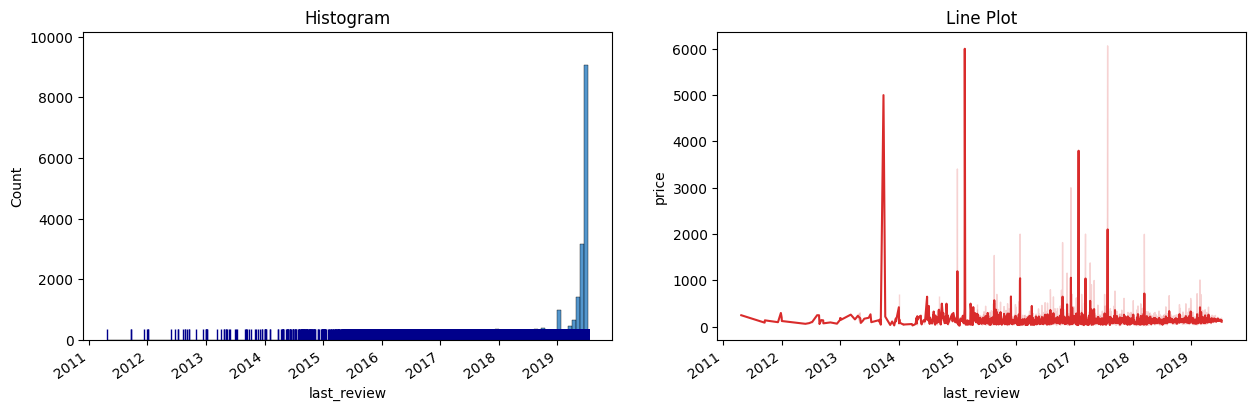

In [254]:
eda_helper_functions.dt_univar_plots(train, 'last_review', target='price')

<Axes: ylabel='last_review'>

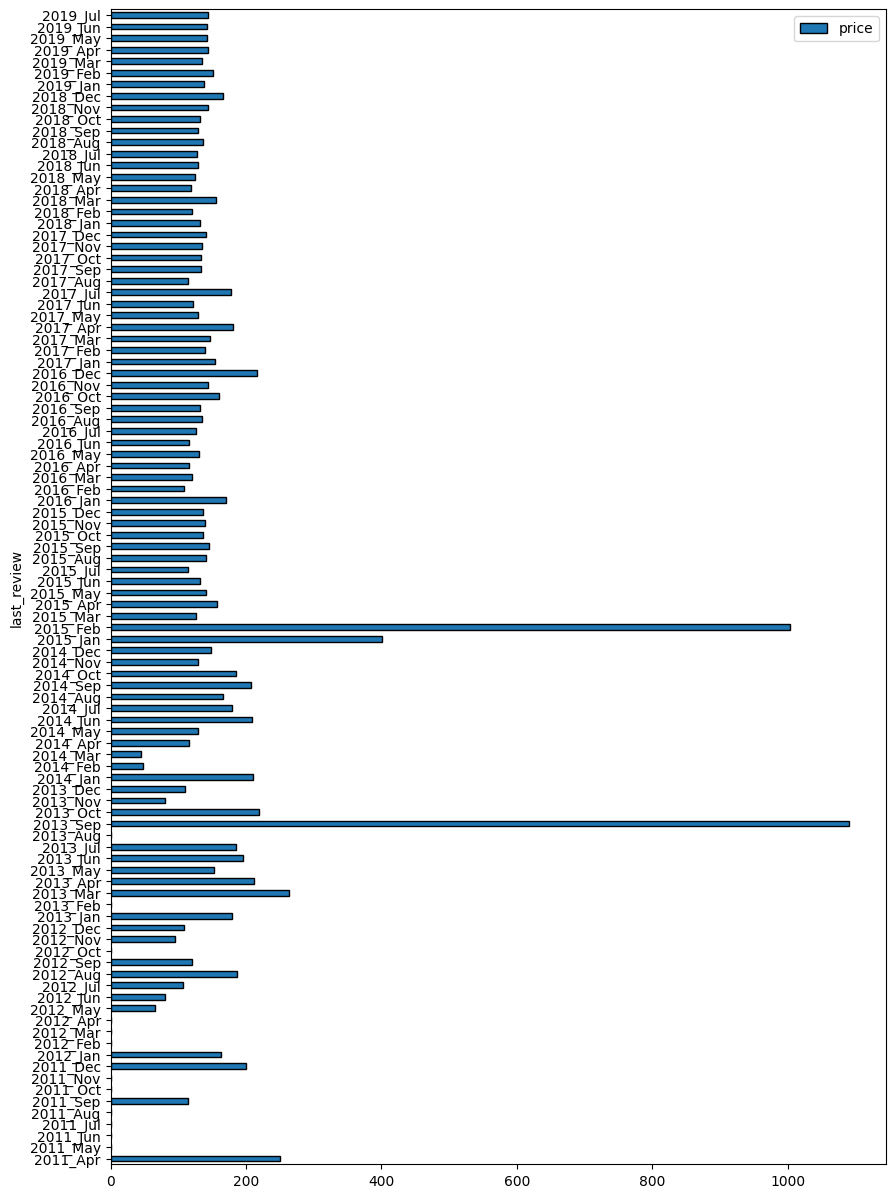

In [255]:
(
    train
    .groupby(pd.Grouper(key='last_review', freq='M'))
    .price.mean()
    .to_frame()
    .pipe(lambda df: df.set_axis(df.index.strftime('%Y_%b')))
    .plot(
        kind='barh',
        figsize=(10, 15),
        edgecolor='k'
    )
)

<Axes: ylabel='last_review'>

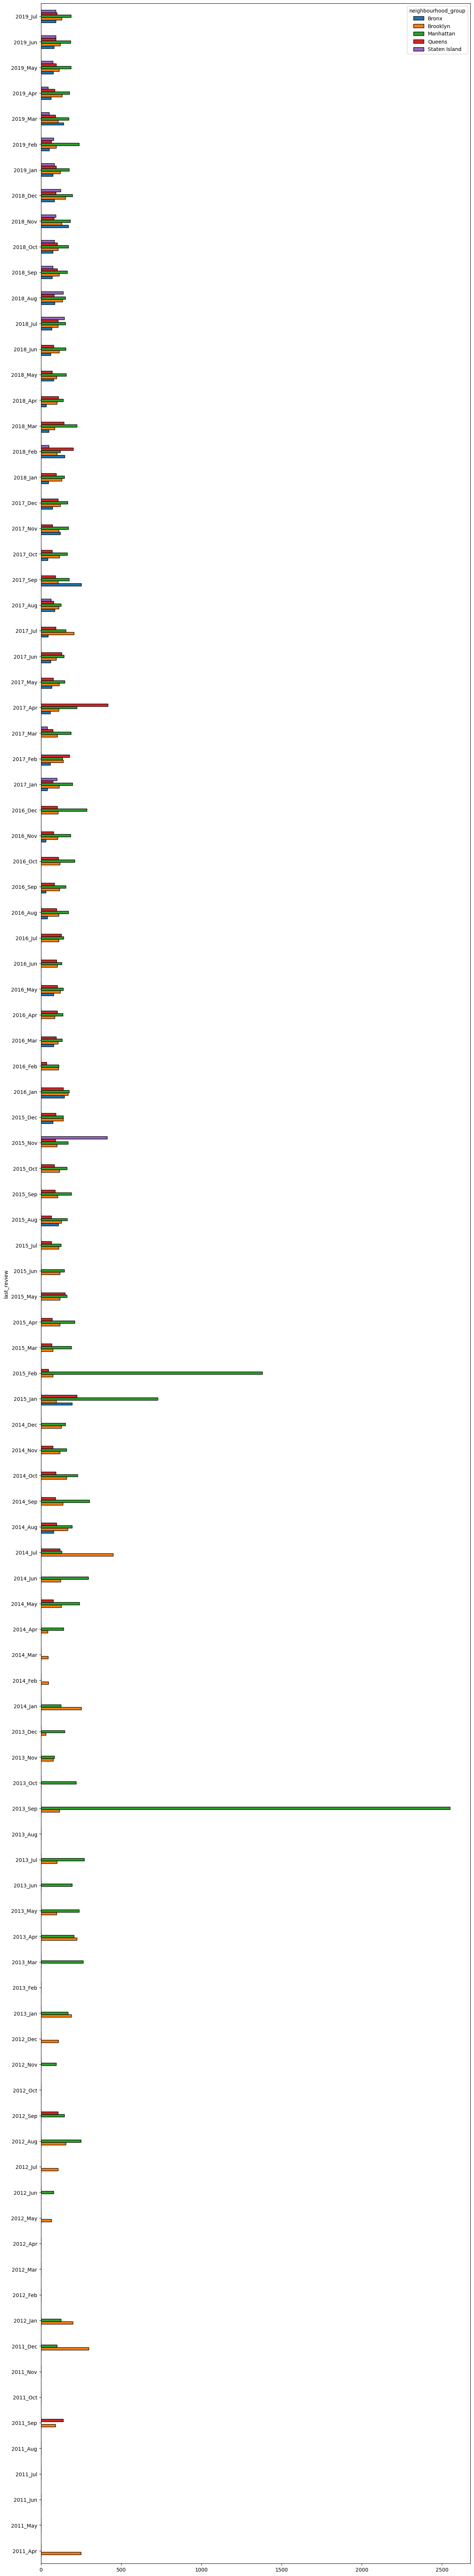

In [256]:
(
    train
    .groupby([pd.Grouper(key='last_review', freq='M'), 'neighbourhood_group'])
    .price.mean()
    .unstack(fill_value=0)
    .pipe(lambda df: df.set_axis(df.index.strftime('%Y_%b')))
    .plot(
        kind='barh',
        figsize=(15, 90),
        edgecolor='k'
    )
)

In [257]:
eda_helper_functions.get_iqr_outliers(train, 'last_review')

Lower Limit : 2017-01-29T00:00:00.000000000
Upper Limit : 2020-11-29T00:00:00.000000000


neighbourhood_group       neighbourhood  latitude  longitude  \
17048            Brooklyn               DUMBO  40.70207  -73.98571   
18743            Brooklyn        Williamsburg  40.71923  -73.96468   
16382              Queens            Flushing  40.74028  -73.83168   
10227           Manhattan        East Village  40.72245  -73.98527   
11164            Brooklyn        Williamsburg  40.71842  -73.95718   
...                   ...                 ...       ...        ...   
28933           Manhattan  Washington Heights  40.83470  -73.94857   
2865             Brooklyn       Crown Heights  40.67534  -73.94958   
10958           Manhattan   Greenwich Village  40.73305  -73.99373   
23921            Brooklyn        Williamsburg  40.71054  -73.95669   
22692              Queens             Astoria  40.75692  -73.92930   

             room_type  minimum_nights  number_of_reviews last_review  \
17048     Private room               3                 14  2011-04-25   
18743     Private room               1                  9  2011-09-18   
16382     Private room               2                  1  2011-09-19   
10227  Entire home/apt               4                 25  2011-12-10   
11164  Entire home/apt               3                  9  2011-12-28   
...                ...             ...                ...         ...   
28933     Private room              30                 36  2017-01-25   
2865      Private room              14                  3  2017-01-25   
10958  Entire home/apt              30                  2  2017-01-27   
23921  Entire home/apt               3                 35  2017-01-28   
22692     Private room               2                 15  2017-01-28   

       reviews_per_month  calculated_host_listings_count  availability_365  \
17048               0.13                               1               189   
18743               0.08                               1               245   
16382               0.01                               1                 1   
10227               0.23                               1                 0   
11164               0.07                               1                 0   
...                  ...                             ...               ...   
28933               0.44                               1               365   
2865                0.07                               1                 0   
10958               0.06                               1               180   
23921               0.71                               1                18   
22692               0.44                               1                 0   

       price  
17048    250  
18743     90  
16382    140  
10227    100  
11164    299  
...      ...  
28933     60  
2865      28  
10958   3800  
23921    180  
22692     61  

[2982 rows x 12 columns]

### 8.6 `reviews_per_month`

In [258]:
eda_helper_functions.num_summary(train, 'reviews_per_month')

0        0.03
1        1.32
2        4.18
3        1.48
4        3.60
         ... 
30944    2.07
30945    1.00
30946     NaN
30947    0.31
30948    0.65
Name: reviews_per_month, Length: 30949, dtype: float64

Data Type      : float64
Missing Data   : 6,246 rows (20.18 %)
Available Data : 24,703 / 30,949 rows


value
percentile         
0            0.0100
5            0.0400
10           0.0600
25           0.1900
50           0.7400
75           2.0200
90           3.6300
95           4.6600
99           7.1798
100         27.9500

value
mean                1.377573
trimmed mean (5%)        NaN
trimmed mean (10%)       NaN
median              0.740000

value
var            2.745717
std            1.657020
IQR            1.830000
mad            0.640000
coef_variance  1.202855

value
skewness  2.235498
kurtosis  9.341190

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.2993845133941645e-101
Test Statistic       : 0.770312858669446
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 1607.0205709763286
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


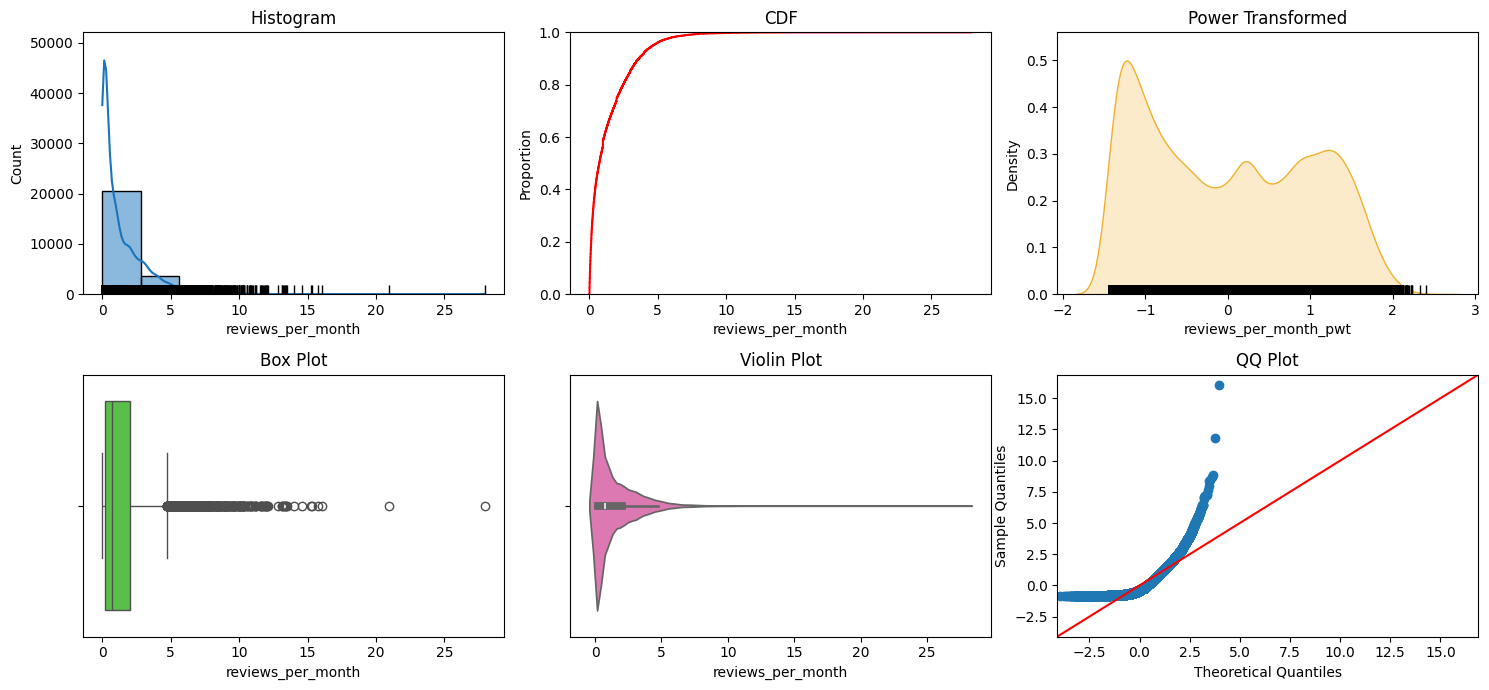

In [259]:
eda_helper_functions.num_univar_plots(train, 'reviews_per_month')

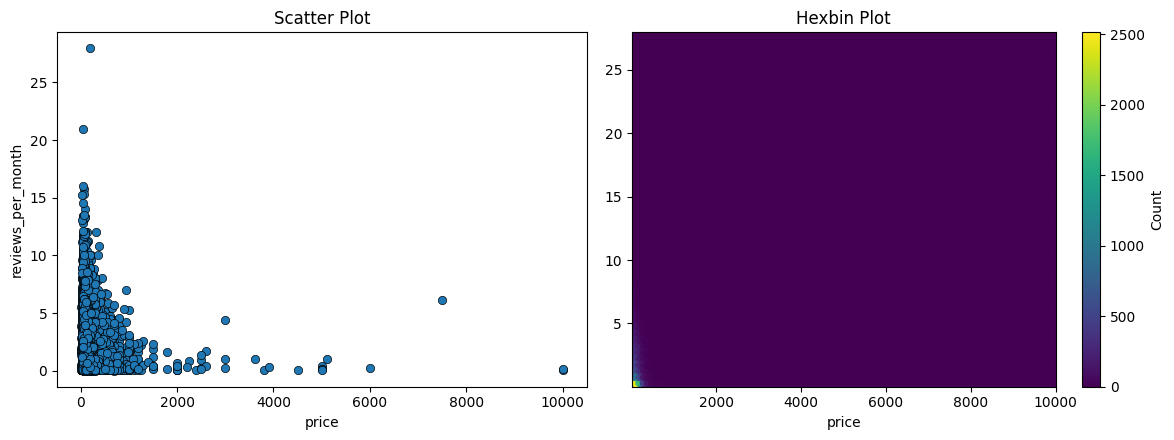

In [260]:
eda_helper_functions.num_bivar_plots(train, 'price', 'reviews_per_month')

In [261]:
eda_helper_functions.num_num_hyp_testing(train, 'price', 'reviews_per_month')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.02867952896918027
- p-value              : 6.5344613681559535e-06
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and reviews_per_month are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.019358078795494643
- p-value              : 0.0023448405314741303
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and reviews_per_month are correlated


In [262]:
eda_helper_functions.get_iqr_outliers(train, 'reviews_per_month')

Lower Limit : -2.555
Upper Limit : 4.765000000000001


neighbourhood_group        neighbourhood  latitude  longitude  \
26287           Manhattan      Lower East Side  40.72163  -73.98715   
10700            Brooklyn             Bushwick  40.69974  -73.93380   
8247            Manhattan               Harlem  40.80965  -73.94696   
24617            Brooklyn   Bedford-Stuyvesant  40.69537  -73.93598   
11518           Manhattan         East Village  40.72636  -73.98454   
...                   ...                  ...       ...        ...   
10106              Queens              Jamaica  40.66793  -73.78452   
5551               Queens  Springfield Gardens  40.66457  -73.76918   
12788              Queens        East Elmhurst  40.76380  -73.87238   
12121              Queens             Rosedale  40.65417  -73.74158   
30216           Manhattan     Theater District  40.75828  -73.98876   

             room_type  minimum_nights  number_of_reviews last_review  \
26287     Private room               2                165  2019-06-17   
10700  Entire home/apt               2                169  2019-06-30   
8247      Private room               1                120  2019-06-22   
24617  Entire home/apt               1                107  2019-07-06   
11518  Entire home/apt               2                 51  2019-07-07   
...                ...             ...                ...         ...   
10106     Private room               1                 95  2019-07-05   
5551   Entire home/apt               1                132  2019-07-05   
12788     Private room               1                436  2019-07-08   
12121     Private room               1                 37  2019-07-08   
30216     Private room               1                 82  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  \
26287               4.77                               2                 2   
10700               4.77                               1                26   
8247                4.77                               3                34   
24617               4.77                               3                64   
11518               4.77                               1                 6   
...                  ...                             ...               ...   
10106              15.32                               8               145   
5551               15.78                               1                28   
12788              16.03                               5               337   
12121              20.94                               1               134   
30216              27.95                               9               299   

       price  
26287    100  
10700    185  
8247     115  
24617    389  
11518    180  
...      ...  
10106     67  
5551      75  
12788     48  
12121     45  
30216    199  

[1155 rows x 12 columns]

### 8.7 `calculated_host_listings_count`

In [263]:
eda_helper_functions.num_summary(train, 'calculated_host_listings_count')

0         1
1         1
2         1
3         3
4         1
         ..
30944     1
30945     1
30946    87
30947     1
30948     1
Name: calculated_host_listings_count, Length: 30949, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


value
percentile       
0             1.0
5             1.0
10            1.0
25            1.0
50            1.0
75            2.0
90            5.0
95           15.0
99          232.0
100         327.0

value
mean                7.144302
trimmed mean (5%)   1.861102
trimmed mean (10%)  1.502322
median              1.000000

value
var            1085.738644
std              32.950548
IQR               1.000000
mad               0.000000
coef_variance     4.612144

value
skewness   7.966788
kurtosis  68.195477

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.2904603807599142e-143
Test Statistic       : 0.17549122790622296
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 9771.196745982561
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [264]:
(
    train
    .assign(
        host_type=lambda df_: np.select(
            [
                df_.calculated_host_listings_count == 1,
                df_.calculated_host_listings_count <= 3,
                df_.calculated_host_listings_count <= 10,
            ],
            [
                'new_host',
                'casual_host',
                'experienced_host'
            ],
            default='professional_host'
        )
    )
    .pipe(eda_helper_functions.cat_summary, 'host_type')
)

0                 new_host
1                 new_host
2                 new_host
3              casual_host
4                 new_host
               ...        
30944             new_host
30945             new_host
30946    professional_host
30947             new_host
30948             new_host
Name: host_type, Length: 30949, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


count      30949
unique         4
top     new_host
freq       20470

count  percentage
category                            
new_host           20470    0.661411
casual_host         6003    0.193964
experienced_host    2611    0.084365
professional_host   1865    0.060260

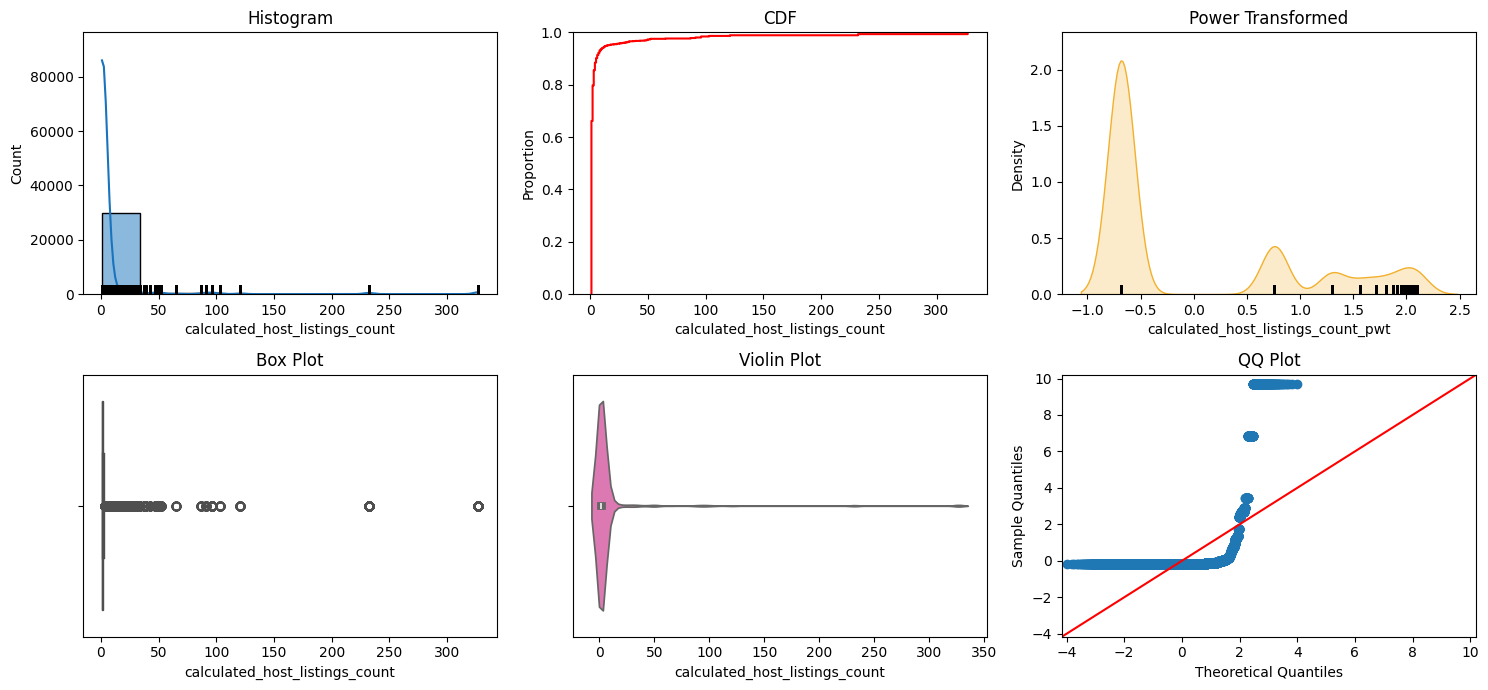

In [265]:
eda_helper_functions.num_univar_plots(train, 'calculated_host_listings_count')

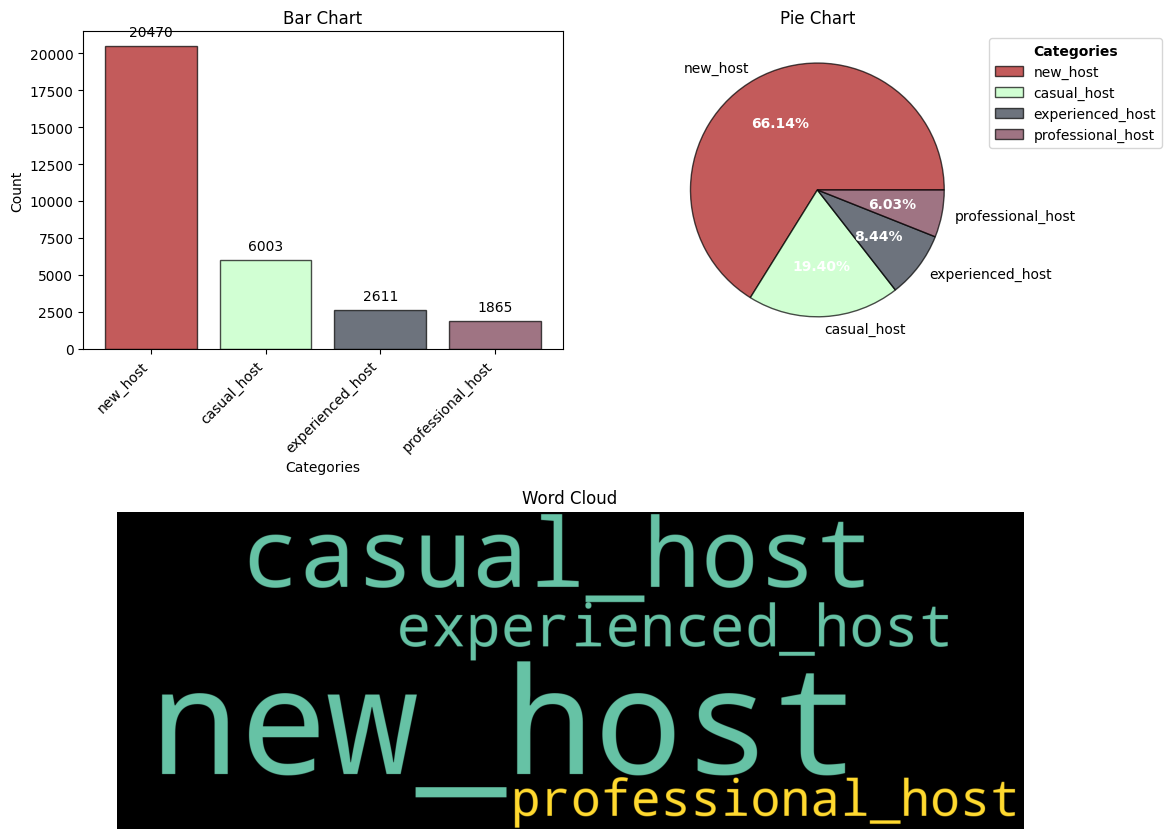

In [266]:
(
    train
    .assign(
        host_type=lambda df_: np.select(
            [
                df_.calculated_host_listings_count == 1,
                df_.calculated_host_listings_count <= 3,
                df_.calculated_host_listings_count <= 10,
            ],
            [
                'new_host',
                'casual_host',
                'experienced_host'
            ],
            default='professional_host'
        )
    )
    .pipe(eda_helper_functions.cat_univar_plots, 'host_type')
)

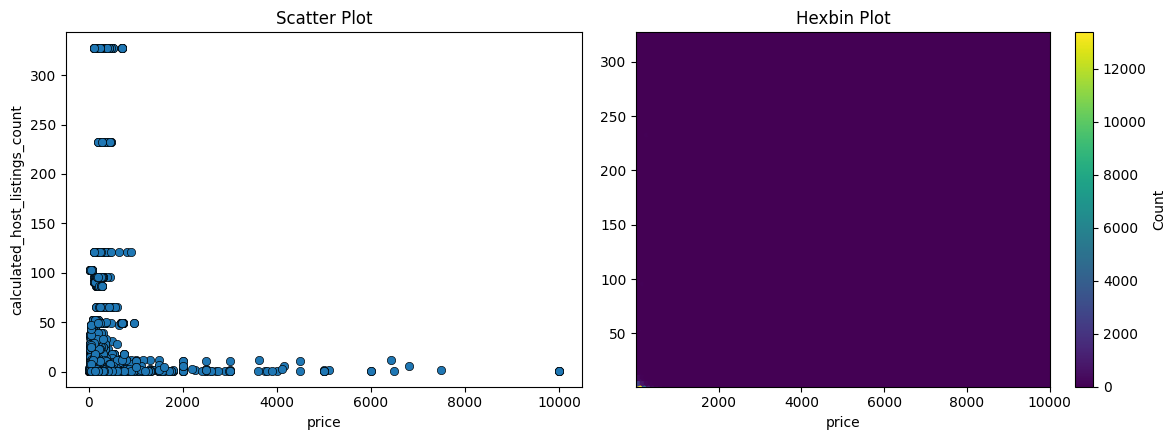

In [267]:
eda_helper_functions.num_bivar_plots(train, 'price', 'calculated_host_listings_count')

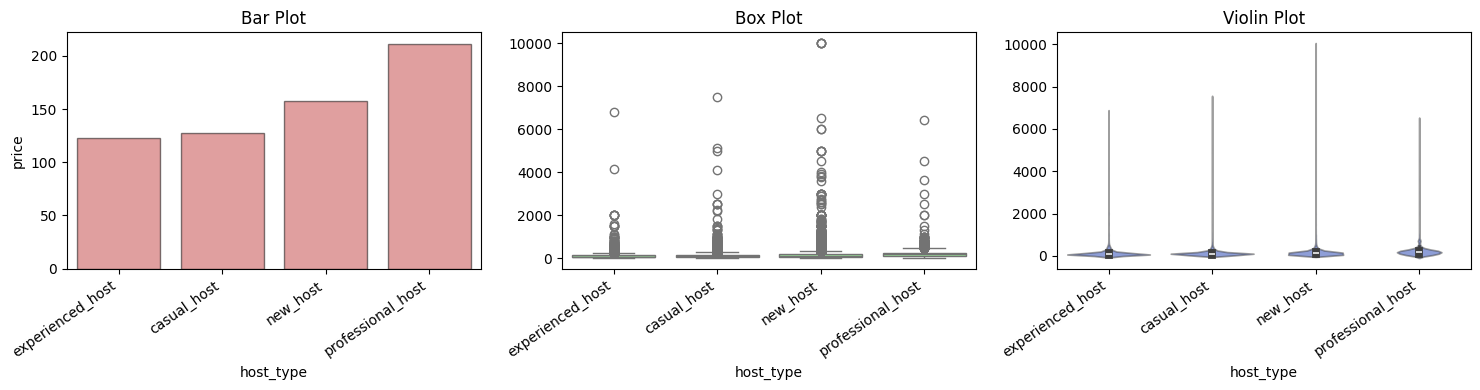

In [268]:
(
    train
    .assign(
        host_type=lambda df_: np.select(
            [
                df_.calculated_host_listings_count == 1,
                df_.calculated_host_listings_count <= 3,
                df_.calculated_host_listings_count <= 10,
            ],
            [
                'new_host',
                'casual_host',
                'experienced_host'
            ],
            default='professional_host'
        )
    )
    .pipe(eda_helper_functions.num_cat_bivar_plots, 'price', 'host_type')
)

In [269]:
eda_helper_functions.num_num_hyp_testing(train, 'price', 'calculated_host_listings_count')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.05683743719193364
- p-value              : 1.4240440183091007e-23
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and calculated_host_listings_count are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.1045650608805759
- p-value              : 5.691753313347266e-76
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and calculated_host_listings_count are correlated


In [270]:
(
    train
    .assign(
        host_type=lambda df_: np.select(
            [
                df_.calculated_host_listings_count == 1,
                df_.calculated_host_listings_count <= 3,
                df_.calculated_host_listings_count <= 10,
            ],
            [
                'new_host',
                'casual_host',
                'experienced_host'
            ],
            default='professional_host'
        )
    )
    .pipe(eda_helper_functions.num_cat_hyp_testing, 'price', 'host_type')
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 80.83388713616455
- p-value              : 4.376075457527276e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and host_type are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1504.351963631065
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and host_type are associated to each other


In [271]:
eda_helper_functions.get_iqr_outliers(train, 'calculated_host_listings_count')

Lower Limit : -0.5
Upper Limit : 3.5


neighbourhood_group       neighbourhood  latitude  longitude  \
30831            Brooklyn        Williamsburg  40.71474  -73.95476   
30802           Manhattan              Harlem  40.81574  -73.95261   
103              Brooklyn        Williamsburg  40.71782  -73.96318   
58               Brooklyn       Crown Heights  40.67580  -73.94146   
50              Manhattan              Harlem  40.80875  -73.94238   
...                   ...                 ...       ...        ...   
18010           Manhattan  Financial District  40.70685  -74.00698   
17961           Manhattan         Murray Hill  40.74883  -73.97520   
18075           Manhattan  Financial District  40.70560  -74.01190   
17916           Manhattan         Murray Hill  40.74868  -73.97563   
30935           Manhattan  Financial District  40.70673  -74.00565   

             room_type  minimum_nights  number_of_reviews last_review  \
30831     Private room               1                 58  2019-06-23   
30802  Entire home/apt               1                 35  2019-06-21   
103    Entire home/apt               1                  0         NaT   
58     Entire home/apt               3                  6  2019-05-12   
50     Entire home/apt              31                 48  2019-06-30   
...                ...             ...                ...         ...   
18010  Entire home/apt              29                  0         NaT   
17961  Entire home/apt              29                  0         NaT   
18075  Entire home/apt               2                  4  2019-06-14   
17916  Entire home/apt               2                  8  2019-06-23   
30935  Entire home/apt              29                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
30831               3.55                               4                50   
30802               1.63                               4               361   
103                  NaN                               4               179   
58                  2.17                               4               246   
50                  3.44                               4               117   
...                  ...                             ...               ...   
18010                NaN                             327               246   
17961                NaN                             327               365   
18075               2.67                             327               293   
17916               2.03                             327               108   
30935                NaN                             327               347   

       price  
30831     88  
30802    130  
103     1000  
58       100  
50       160  
...      ...  
18010    130  
17961    200  
18075    256  
17916    257  
30935    100  

[4476 rows x 12 columns]

### 8.8 `availability_365`

In [272]:
eda_helper_functions.num_summary(train, 'availability_365')

0          0
1          0
2        315
3        303
4        282
        ... 
30944    324
30945    179
30946    190
30947    198
30948      0
Name: availability_365, Length: 30949, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


value
percentile       
0             0.0
5             0.0
10            0.0
25            0.0
50           44.0
75          225.0
90          337.0
95          359.0
99          365.0
100         365.0

value
mean                112.177389
trimmed mean (5%)   104.428253
trimmed mean (10%)   95.771617
median               44.000000

value
var            17283.809556
std              131.467903
IQR              225.000000
mad               44.000000
coef_variance      1.171964

value
skewness  0.770716
kurtosis -0.986964

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.3420957745656628e-104
Test Statistic       : 0.7904210764596954
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 2585.0383962468113
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


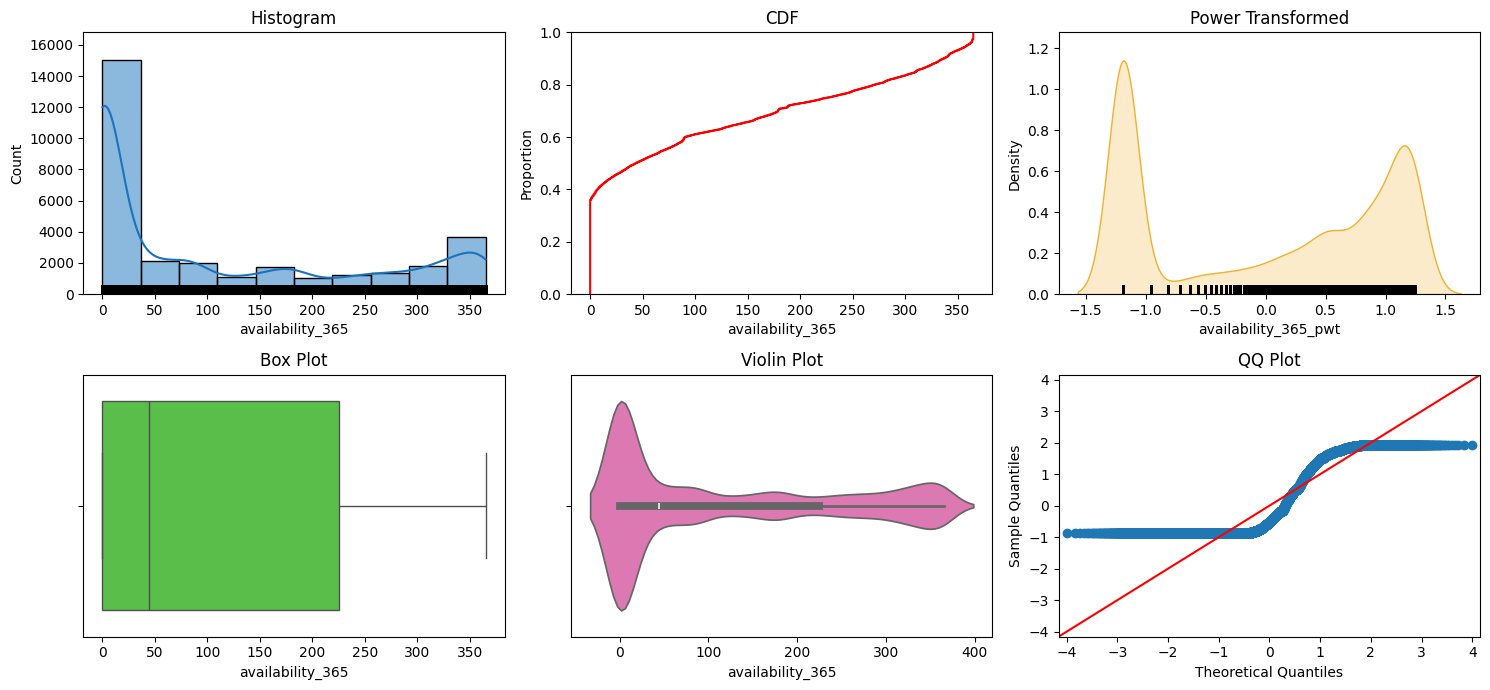

In [273]:
eda_helper_functions.num_univar_plots(train, 'availability_365')

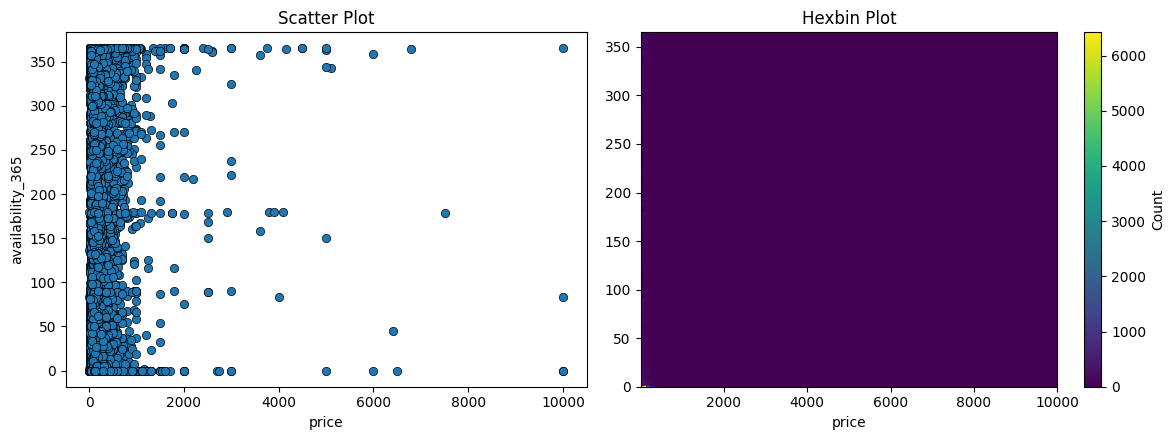

In [274]:
eda_helper_functions.num_bivar_plots(train, 'price', 'availability_365')

In [275]:
eda_helper_functions.num_num_hyp_testing(train, 'price', 'availability_365')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.08615454884699003
- p-value              : 4.499070425302539e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and availability_365 are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.09031178652703552
- p-value              : 4.6153381798677285e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and availability_365 are correlated


In [276]:
eda_helper_functions.get_iqr_outliers(train, 'availability_365')

Lower Limit : -337.5
Upper Limit : 562.5


Empty DataFrame
Columns: [neighbourhood_group, neighbourhood, latitude, longitude, room_type, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, price]
Index: []

### 8.9 `price`

In [277]:
train.price

0         50
1        140
2        125
3        450
4         68
        ... 
30944     45
30945    200
30946    270
30947    190
30948    125
Name: price, Length: 30949, dtype: int64

In [278]:
eda_helper_functions.num_summary(train, 'price')

0         50
1        140
2        125
3        450
4         68
        ... 
30944     45
30945    200
30946    270
30947    190
30948    125
Name: price, Length: 30949, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


value
percentile          
0              10.00
5              40.00
10             49.00
25             69.00
50            105.00
75            175.00
90            269.00
95            355.00
99            773.28
100         10000.00

value
mean                152.128179
trimmed mean (5%)   127.607539
trimmed mean (10%)  121.557449
median              105.000000

value
var            53910.605161
std              232.186574
IQR              106.000000
mad               45.000000
coef_variance      1.526256

value
skewness   19.211375
kurtosis  609.390811

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.311563335365928e-138
Test Statistic       : 0.3119333509992981
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 4446.809294799998
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


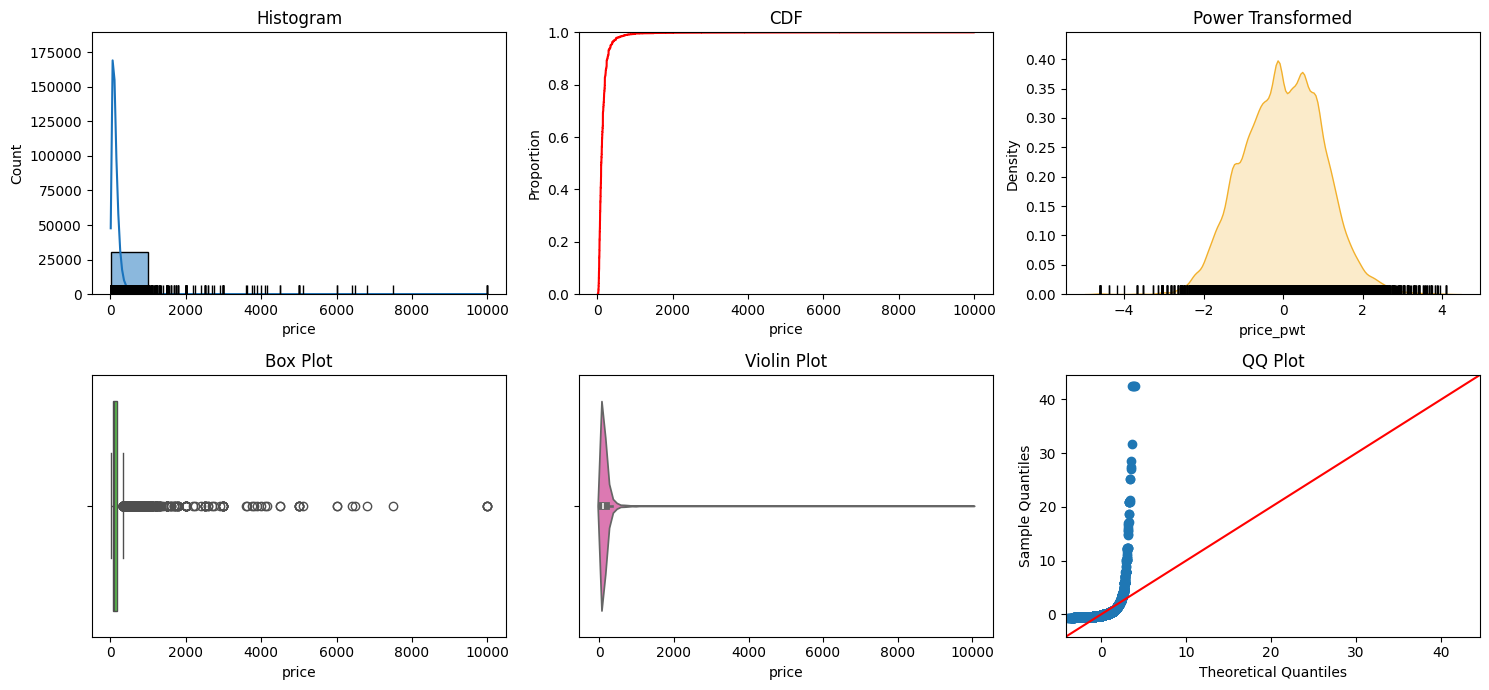

In [279]:
eda_helper_functions.num_univar_plots(train, 'price')

In [280]:
eda_helper_functions.get_iqr_outliers(train, 'price')

Lower Limit : -90.0
Upper Limit : 334.0


neighbourhood_group       neighbourhood  latitude  longitude  \
25945            Brooklyn       Crown Heights  40.67978  -73.96231   
2191             Brooklyn  Bedford-Stuyvesant  40.68282  -73.92934   
21258            Brooklyn         Fort Greene  40.69032  -73.97678   
9150            Manhattan      Hell's Kitchen  40.76235  -73.98995   
4263            Manhattan             Midtown  40.76633  -73.98145   
...                   ...                 ...       ...        ...   
11827            Brooklyn       East Flatbush  40.65724  -73.92450   
9493            Manhattan         East Harlem  40.79264  -73.93898   
24655           Manhattan     Lower East Side  40.71980  -73.98566   
10063            Brooklyn          Greenpoint  40.73260  -73.95739   
28033           Manhattan     Upper West Side  40.77213  -73.98665   

             room_type  minimum_nights  number_of_reviews last_review  \
25945  Entire home/apt               2                  1  2019-07-01   
2191   Entire home/apt               2                 21  2019-06-16   
21258  Entire home/apt               3                 16  2019-06-23   
9150   Entire home/apt               3                  3  2019-06-26   
4263   Entire home/apt              30                  0         NaT   
...                ...             ...                ...         ...   
11827     Private room               1                  8  2019-07-07   
9493   Entire home/apt               5                  1  2015-01-02   
24655  Entire home/apt              30                  0         NaT   
10063  Entire home/apt               5                  5  2017-07-27   
28033  Entire home/apt              30                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
25945               1.00                               3               365   
2191                0.53                               1               304   
21258               1.67                               2                81   
9150                3.00                               1               144   
4263                 NaN                             121               201   
...                  ...                             ...               ...   
11827               6.15                               2               179   
9493                0.02                               1                 0   
24655                NaN                               1               365   
10063               0.16                               1                 0   
28033                NaN                               1                83   

       price  
25945    335  
2191     335  
21258    335  
9150     335  
4263     335  
...      ...  
11827   7500  
9493    9999  
24655   9999  
10063  10000  
28033  10000  

[1878 rows x 12 columns]

### `neighbourhood`

In [281]:
train.neighbourhood

0        Washington Heights
1                 Chinatown
2                  Elmhurst
3                    Harlem
4            Queens Village
                ...        
30944           Bensonhurst
30945             Sunnyside
30946    Financial District
30947          Williamsburg
30948               Midtown
Name: neighbourhood, Length: 30949, dtype: object

In [283]:
eda_helper_functions.cat_summary(train, 'neighbourhood')

0        Washington Heights
1                 Chinatown
2                  Elmhurst
3                    Harlem
4            Queens Village
                ...        
30944           Bensonhurst
30945             Sunnyside
30946    Financial District
30947          Williamsburg
30948               Midtown
Name: neighbourhood, Length: 30949, dtype: object

Data Type      : object
Cardinality    : 217 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 30,949 / 30,949 rows


count          30949
unique           217
top     Williamsburg
freq            2483

count  percentage
category                                     
Williamsburg                 2483    0.080229
Bedford-Stuyvesant           2387    0.077127
Harlem                       1664    0.053766
Bushwick                     1533    0.049533
Upper West Side              1255    0.040551
Hell's Kitchen               1222    0.039484
East Village                 1147    0.037061
Upper East Side              1121    0.036221
Midtown                       996    0.032182
Crown Heights                 972    0.031407
Greenpoint                    721    0.023296
East Harlem                   706    0.022812
Chelsea                       700    0.022618
Lower East Side               614    0.019839
Washington Heights            581    0.018773
Astoria                       569    0.018385
West Village                  488    0.015768
Financial District            466    0.015057
Flatbush                      384    0.012408
Clinton Hill                  351    0.011341
Long Island City              335    0.010824
Prospect-Lefferts Gardens     330    0.010663
Murray Hill                   325    0.010501
East Flatbush                 321    0.010372
Park Slope                    309    0.009984
Fort Greene                   307    0.009920
Kips Bay                      299    0.009661
Ridgewood                     273    0.008821
Flushing                      260    0.008401
Sunset Park                   254    0.008207
Greenwich Village             241    0.007787
SoHo                          238    0.007690
Sunnyside                     233    0.007529
Prospect Heights              230    0.007432
Chinatown                     221    0.007141
Morningside Heights           220    0.007108
Gramercy                      215    0.006947
Ditmars Steinway              206    0.006656
Theater District              183    0.005913
Carroll Gardens               171    0.005525
South Slope                   168    0.005428
Inwood                        164    0.005299
Woodside                      153    0.004944
Jamaica                       152    0.004911
Gowanus                       148    0.004782
Nolita                        148    0.004782
East New York                 146    0.004717
Elmhurst                      144    0.004653
Jackson Heights               125    0.004039
East Elmhurst                 124    0.004007
Boerum Hill                   116    0.003748
Kensington                    115    0.003716
Windsor Terrace               110    0.003554
Tribeca                       109    0.003522
Sheepshead Bay                109    0.003522
Canarsie                       88    0.002843
Borough Park                   87    0.002811
Brooklyn Heights               87    0.002811
Cypress Hills                  87    0.002811
Bay Ridge                      85    0.002746
Forest Hills                   83    0.002682
Little Italy                   80    0.002585
Maspeth                        75    0.002423
Midwood                        66    0.002133
Rego Park                      66    0.002133
St. Albans                     58    0.001874
Richmond Hill                  58    0.001874
Springfield Gardens            57    0.001842
Downtown Brooklyn              55    0.001777
NoHo                           54    0.001745
Flatlands                      53    0.001712
Cobble Hill                    53    0.001712
Bensonhurst                    52    0.001680
Woodhaven                      50    0.001616
Roosevelt Island               50    0.001616
Arverne                        48    0.001551
Corona                         47    0.001519
Flatiron District              46    0.001486
Brighton Beach                 45    0.001454
Red Hook                       44    0.001422
Kingsbridge                    44    0.001422
Briarwood                      42    0.001357
Fort Hamilton                  42    0.001357
Battery Park City              41    0.001325
Longwood                       41    0.001325
Rosedale                  

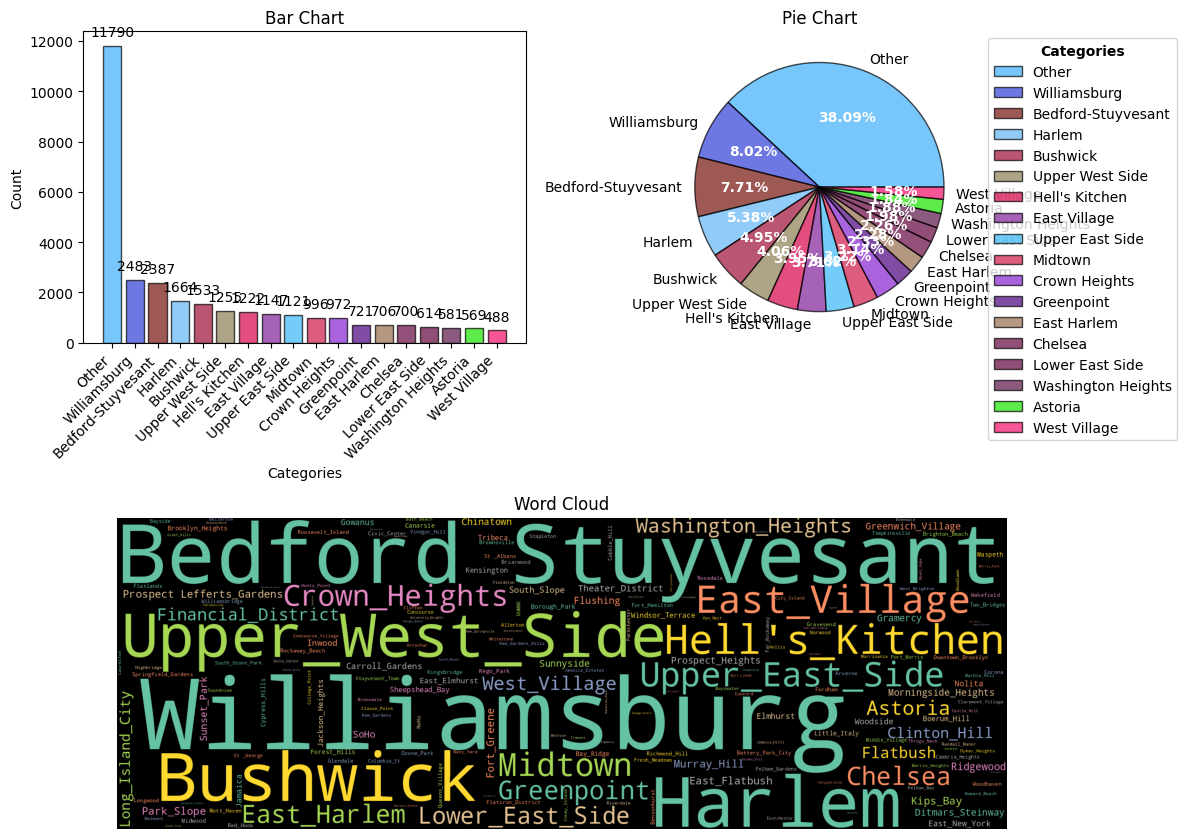

In [285]:
eda_helper_functions.cat_univar_plots(train, 'neighbourhood', k=17)

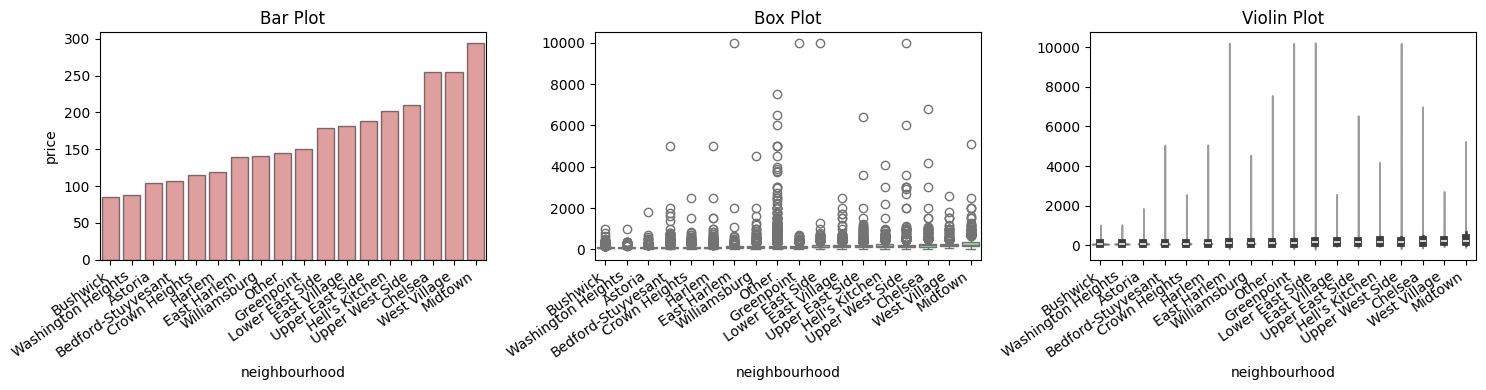

In [287]:
eda_helper_functions.num_cat_bivar_plots(train, 'price', 'neighbourhood', k=17)

In [288]:
eda_helper_functions.num_cat_hyp_testing(train, 'price', 'neighbourhood')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 11.0777398338631
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and neighbourhood are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 9380.481978963951
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and neighbourhood are associated to each other


In [282]:
train.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price'],
      dtype='object')